# SÉRIES TEMPORAIS

* [1. Importando Pacotes e Ajustando configurações](#section_1)
* [2. Lendo e Entendendo os Dados a Serem analisados](#chapter2)
* [3. Usando o Modelo Auto ARIMA](#chapter3)
    * [3.1. Fazendo previsão Diária - Todas Categorias](#section_3_1)
        * [3.1.1. Dividindo o dataset (Treino e Teste) - Todas Categorias - AUTO ARIMA](#section_3_1_1)
        * [3.1.2. Ajuste Modelo AUTO ARIMA - Todas Categorias](#section_3_1_2)
        * [3.1.3. Aplcando o Modelo Treinado na base de Teste - AUTO ARIMA - Todas Categorias](#section_3_1_3)     
        * [3.1.4. Medidas de Avaliação do Modelo - AUTO ARIMA - Todas Categorias](#section_3_1_4)
        * [3.1.5. Prevendo Futuros valores Desconhecidos - AUTO ARIMA - Todas Categorias](#section_3_1_5)
* [4. Trabalhando com Redes Neurais Recorrentes (RNN)](#chapter4)
    * [4.1. Modelo LSTM](#section_4_1)
        * [4.1.1. Preparando os dados para o modelo](#section_4_1_1)
        * [4.1.2. Construindo o Modelo LSTM](#section_4_1_2)
        * [4.1.3. Calculando as Predições com LSTM](#section_4_1_3)
        * [4.1.4. Medidas de Avaliação do Modelo ](#section_4_1_4)
    * [4.2. Modelo LSTM apenas para o ano 2021](#section_4_2)
        * [4.2.1. Preparando os dados para o modelo - 2021](#section_4_2_1)
        * [4.2.2. Construindo o Modelo LSTM - 2021](#section_4_2_2)
        * [4.2.3. Calculando as Predições com LSTM - 2021](#section_4_2_3)
        * [4.2.4. Medidas de Avaliação do Modelo 2021](#section_4_2_4)
    * [4.3. Comparando os Modelos](#section_4_3)
* [5. Previsão dos próximos 21 dias - Todas Categorias](#chapter5)
* [6. Modelos por Categorias Usando LSTM](#chapter6)
    * [6.1. Categoria 1 - Modelo LSTM](#section_6_1)
        * [6.1.1. Preparando os dados para o modelo - Categoria 1](#section_6_1_1)
        * [6.1.2. Construindo o Modelo LSTM - Categoria 1](#section_6_1_2)
        * [6.1.3. Calculando as Predições com LSTM - Categoria 1](#section_6_1_3)
        * [6.1.4. Medidas de Avaliação do Modelo - Categoria 1](#section_6_1_4)
    * [6.2. Categoria 2 - Modelo LSTM](#section_6_2)
        * [6.2.1. Preparando os dados para o modelo - Categoria 2](#section_6_2_1)
        * [6.2.2. Construindo o Modelo LSTM - Categoria 2](#section_6_2_2)
        * [6.2.3. Calculando as Predições com LSTM - Categoria 2](#section_6_2_3)
        * [6.2.4. Medidas de Avaliação do Modelo - Categoria 2](#section_6_2_4)
    * [6.3. Categoria 3 - Modelo LSTM](#section_6_1)
        * [6.3.1. Preparando os dados para o modelo - Categoria 2](#section_6_3_1)
        * [6.3.2. Construindo o Modelo LSTM - Categoria 2](#section_6_3_2)
        * [6.3.3. Calculando as Predições com LSTM - Categoria 2](#section_6_3_3)
        * [6.3.4. Medidas de Avaliação do Modelo - Categoria 2](#section_6_3_4)
* [7. Fazendo previsão dos próximos 21 dias - Por Categorias](#chapter7)
    * [7.1. Categoria 1 - Próximos 21 dias](#section_7_1)
    * [7.2. Categoria 2 - Próximos 21 dias](#section_7_2)
    * [7.3. Categoria 3 - Próximos 21 dias](#section_7_3)
* [8. Comparando os modelos](#chapter8)
* [9. Considerações e Sugestões Finais](#chapter9)
    * [9.1. Fazendo previsão de todas categorias juntas por mês](#section_9_1)
        * [9.1.1. Modelo AUTO ARIMA para previsão mensal](#section_9_1_1)
        * [9.1.2. Dividindo o dataset (Treino e Teste) - Previsão Mensal](#section_9_1_2)
        * [9.1.3. Prevendo Futuros valores Desconhecidos por mês](#section_9_1_3)


# 1. Importando Pacotes e Ajustando configurações <a class="anchor" id="chapter1"></a>

In [7]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.arima_model import ARIMA
import plotly.express as px
import pmdarima as pm
import datetime
from datetime import timedelta
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
plt.style.use('fivethirtyeight')

In [8]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [9]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

# 2. Lendo e Entendendo os Dados a Serem analisados <a class="anchor" id="chapter2"></a>

In [10]:
df = pd.read_csv('series.csv')
df.head()

,CATEGORY,DATE,UNITS_SOLD
0,CATEG-1,2021-08-17,59
1,CATEG-1,2020-09-19,40
2,CATEG-2,2021-10-26,23
3,CATEG-1,2021-04-27,60
4,CATEG-2,2021-05-05,61


# 3. Usando o Modelo Auto ARIMA <a class="anchor" id="chapter3"></a>

Utilizarei o modelo AUTO ARIMA para fazer a previsão de vendas.

Iniciarei fazendo a previsão diária com o modelo Auto Arima e com todas as categorias juntas

## 3.1. Fazendo previsão Diária - Todas Categorias <a class="anchor" id="section_3_1"></a>

Observando os dados do dataframe

In [ ]:
fig = px.line(df, x='DATE', y='UNITS_SOLD', title='Quantidade Vendida')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

A primeira visualização dos dados não é satisfatória. Irei realizar aguns procedimentos para que possa ter um melhor resultado.

O primeiro passo é transforma a coluna DATE no index do dataframe

In [11]:
el_df=df.set_index('DATE')

array([<AxesSubplot:xlabel='DATE'>], dtype=object)

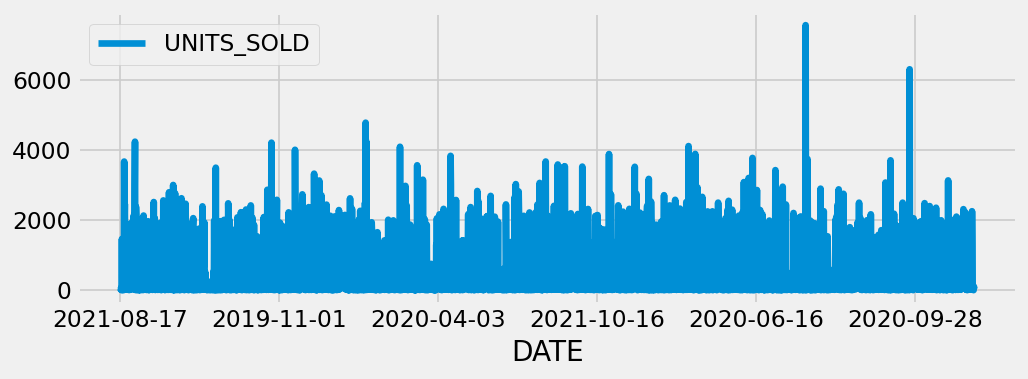

In [12]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
el_df.plot(subplots=True)

In [13]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   CATEGORY      False
DATE          False
UNITS_SOLD    False
dtype: bool


In [14]:
el_df.head()

,CATEGORY,UNITS_SOLD
DATE,,
2021-08-17,CATEG-1,59
2020-09-19,CATEG-1,40
2021-10-26,CATEG-2,23
2021-04-27,CATEG-1,60
2021-05-05,CATEG-2,61


Houve melhora na visualização dos dados, ainda assim há uma grande quantidade de dados a serem analisadas. É preciso realizar uma técnica chamada resampling pela variável tempo (que agora é o index de nosso dataframe), desta maneira irei agragar os dados de UNITS_SOLD por meses. Com isto terei menos dados no dataframe, o que irá facilitar a análise de séries temporais.

In [15]:
el_df.index = pd.to_datetime(el_df.index)

array([<AxesSubplot:xlabel='DATE'>], dtype=object)

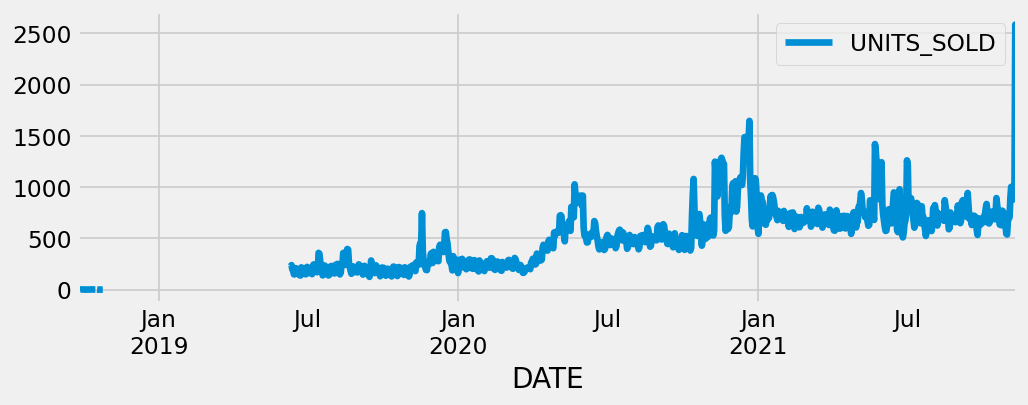

In [16]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
el_df.resample('D').mean().plot(subplots=True)

Após realizar o resampling a visualização dos dados esta clara. É possível observar ausência de dados entre os meses de janeiro e junho de 2019. A análise de séries temporais não permite valores nulos, por este motivo montarei meu dataframe final sem os valores nulos.

Deste gráfico também é possível observar possíveis indícios de sazonalidade, nos períodos de meio e final de ano. Levarei isso em consideração no momento em que for indicar os parâmetros do modelo de séries temporais

In [17]:
final_df=el_df.resample('D').mean()
final_df = final_df[final_df['UNITS_SOLD'].notna()]

array([<AxesSubplot:xlabel='DATE'>], dtype=object)

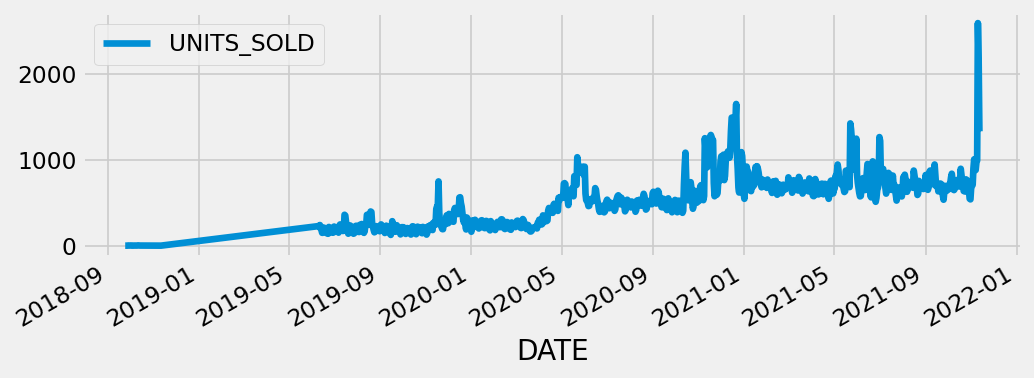

In [18]:
final_df.plot(subplots=True)

In [19]:
print ("\nMissing values :  ", final_df.isnull().any())


Missing values :   UNITS_SOLD    False
dtype: bool


### 3.1.1. Dividindo o dataset (Treino e Teste) - Todas Categorias - AUTO ARIMA <a class="anchor" id="section_3_1_1"></a>

Realizarei o corte do dataset na data de 31 de agosto de 2021, desta maneira terei 30 pontos para serem treinados e 3 para serem testados no dataset test

In [20]:
final_df = final_df[final_df['UNITS_SOLD'].notna()]
print ("\nMissing values :  ", final_df.isnull().any())


Missing values :   UNITS_SOLD    False
dtype: bool


In [21]:
final_df.tail(21)

,UNITS_SOLD
DATE,
2021-10-23,633.000000
2021-10-24,628.000000
2021-10-25,770.333333
2021-10-26,764.000000
2021-10-27,743.000000
2021-10-28,683.666667
2021-10-29,642.333333
2021-10-30,545.333333
2021-10-31,537.666667


In [22]:
final_df.shape

(921, 1)

In [23]:
train=final_df[(final_df.index.get_level_values(0) >= '2018-09-24') & (final_df.index.get_level_values(0) <= '2021-10-22')]

In [24]:
test=final_df[(final_df.index.get_level_values(0) > '2021-10-22')]

In [25]:
train.shape

(900, 1)

In [26]:
test.shape

(21, 1)

### 3.1.2. Ajuste Modelo AUTO ARIMA - Todas Categorias <a class="anchor" id="section_3_1_2"></a>

In [27]:
model = pm.auto_arima(final_df['UNITS_SOLD'], 
                        m=7, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=13127.454, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=11114.605, Time=0.99 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=11886.333, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=14393.964, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=11183.883, Time=0.16 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=11054.303, Time=1.97 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=10994.217, Time=2.30 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=10989.709, Time=1.19 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=11143.568, Time=0.55 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=10994.565, Time=1.85 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=11099.137, Time=1.01 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=11076.480, Time=1.69 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=10986.021, Time=1.41 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=11143.907, Time=0.71 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=11113.043, Time=1.73 sec
 ARIMA(2,0,0)(2,0,1)[7] intercept   : AIC=10988.310, Time=2.35 sec
 ARIMA(2,0,0)(1,0,2)[7] intercept   : AIC=11015.529, Time=2.22 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=11184.724, Time=0.27 sec
 ARIMA(2,0,0)(0,0,2)[7] intercept   : AIC=11096.637, Time=1.56 sec
 ARIMA(2,0,0)(2,0,0)[7] intercept   : AIC=11046.120, Time=2.21 sec
 ARIMA(2,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=3.22 sec
 ARIMA(3,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(2,0,1)(1,0,1)[7] intercept   : AIC=10995.036, Time=1.62 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=10983.586, Time=1.69 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=11142.389, Time=0.85 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=11110.432, Time=1.20 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=10992.836, Time=2.57 sec
 ARIMA(1,0,1)(1,0,2)[7] intercept   : AIC=10991.620, Time=2.70 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=11183.538, Time=0.13 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,1)(0,0,2)[7] intercept   : AIC=11093.491, Time=1.72 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=11041.181, Time=2.76 sec
 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=3.75 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=11418.955, Time=1.37 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=10957.132, Time=1.92 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,1)[7] intercept   : AIC=11088.934, Time=1.19 sec
 ARIMA(1,0,2)(1,0,0)[7] intercept   : AIC=11074.468, Time=1.40 sec
 ARIMA(1,0,2)(2,0,1)[7] intercept   : AIC=10961.387, Time=2.67 sec
 ARIMA(1,0,2)(1,0,2)[7] intercept   : AIC=10967.951, Time=3.50 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=11111.781, Time=0.59 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,2)[7] intercept   : AIC=11058.431, Time=1.27 sec
 ARIMA(1,0,2)(2,0,0)[7] intercept   : AIC=11025.866, Time=2.51 sec
 ARIMA(1,0,2)(2,0,2)[7] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=11527.504, Time=1.90 sec
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=10988.780, Time=2.36 sec
 ARIMA(1,0,3)(1,0,1)[7] intercept   : AIC=10955.314, Time=2.65 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,3)(0,0,1)[7] intercept   : AIC=11078.609, Time=1.69 sec
 ARIMA(1,0,3)(1,0,0)[7] intercept   : AIC=11066.774, Time=1.71 sec
 ARIMA(1,0,3)(2,0,1)[7] intercept   : AIC=10957.838, Time=3.15 sec
 ARIMA(1,0,3)(1,0,2)[7] intercept   : AIC=inf, Time=4.56 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,3)(0,0,0)[7] intercept   : AIC=11100.702, Time=0.87 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,3)(0,0,2)[7] intercept   : AIC=11051.015, Time=3.33 sec
 ARIMA(1,0,3)(2,0,0)[7] intercept   : AIC=11023.357, Time=2.80 sec
 ARIMA(1,0,3)(2,0,2)[7] intercept   : AIC=inf, Time=4.70 sec
 ARIMA(0,0,3)(1,0,1)[7] intercept   : AIC=12257.293, Time=2.39 sec
 ARIMA(2,0,3)(1,0,1)[7] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,4)(1,0,1)[7] intercept   : AIC=10955.723, Time=2.90 sec
 ARIMA(0,0,4)(1,0,1)[7] intercept   : AIC=inf, Time=3.08 sec
 ARIMA(2,0,4)(1,0,1)[7] intercept   : AIC=10981.989, Time=3.14 sec
 ARIMA(1,0,3)(1,0,1)[7]             : AIC=inf, Time=2.16 sec

Best model:  ARIMA(1,0,3)(1,0,1)[7] intercept
Total fit time: 114.649 seconds


In [28]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  921
Model:             SARIMAX(1, 0, 3)x(1, 0, [1], 7)   Log Likelihood               -5469.657
Date:                             Thu, 04 Aug 2022   AIC                          10955.314
Time:                                     19:44:39   BIC                          10993.917
Sample:                                          0   HQIC                         10970.044
                                             - 921                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2178      0.235      0.928      0.354      -0.242       0.678
ar.L1          0.9501      

Os parâmetros utilizados no modelo AUTO ARIMA foram os seguintes:

* m=12 - Representa o número de meses em um ano
* start_p=0 - Representa o valor mínimo de p (Parâmetro de Auto Correlação) que a função pode selecionar durante a busca aletória
* start_q=0 - Representa o valor mínimo de q (Parâmetro de Médias Móveis) que a função pode selecionar durante a busca aletória.
* mar_order=4 - Representa o máximo que os parâmetros p,d e q podem assumir durante a busca aletória
* test='adf' - Para que se utilize o teste ADF para verificar a estacionariedade da série
* suppress_warnings=True - suprimir mensagens de avisos
* stepwise=True - Método de busca pelo melhor parametro


O melhor modelo arima encontrado foi ARIMA(1,0,3)(p=1,d=0,q=3).

Houveram dois procedimento de diferenciação da série, o que confirma a suspeita inicial de haver sazonalidade na série

### 3.1.3. Aplcando o Modelo Treinado na base de Teste - AUTO ARIMA - Todas Categorias <a class="anchor" id="section_3_1_3"></a>

In [29]:
model.fit(train['UNITS_SOLD'])

ARIMA(order=(1, 0, 3), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [30]:
forecast=model.predict(n_periods=21, return_conf_int=True)

In [31]:
forecast

(array([593.53442607, 639.91580638, 741.75691979, 724.0231672 ,
        712.69623284, 692.92197245, 653.71275488, 606.18427193,
        643.32656293, 741.28199783, 723.50369434, 712.08395348,
        692.31765544, 653.32717471, 606.11472067, 642.72878138,
        739.55214346, 721.82283606, 710.39744385, 690.71887254,
        652.01886039]),
 array([[ 450.93380748,  736.13504467],
        [ 439.98381483,  839.84779794],
        [ 514.27403195,  969.23980762],
        [ 479.43415071,  968.61218369],
        [ 454.33668547,  971.0557802 ],
        [ 423.31172504,  962.53221986],
        [ 374.8145616 ,  932.61094817],
        [ 316.63648983,  895.73205404],
        [ 344.787003  ,  941.86612285],
        [ 435.62025227, 1046.94374339],
        [ 412.03214832, 1034.97524035],
        [ 395.71456366, 1028.45334329],
        [ 371.80720655, 1012.82810433],
        [ 329.30726887,  977.34708054],
        [ 277.35379204,  934.87564931],
        [ 309.85329777,  975.60426498],
        [ 403.43

In [32]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

Após treino dos dados, os dados previstos são os seguintes:

In [33]:
forecast_df

,Prediction
DATE,
2021-10-23,593.534426
2021-10-24,639.915806
2021-10-25,741.756920
2021-10-26,724.023167
2021-10-27,712.696233
2021-10-28,692.921972
2021-10-29,653.712755
2021-10-30,606.184272
2021-10-31,643.326563


<AxesSubplot:xlabel='DATE'>

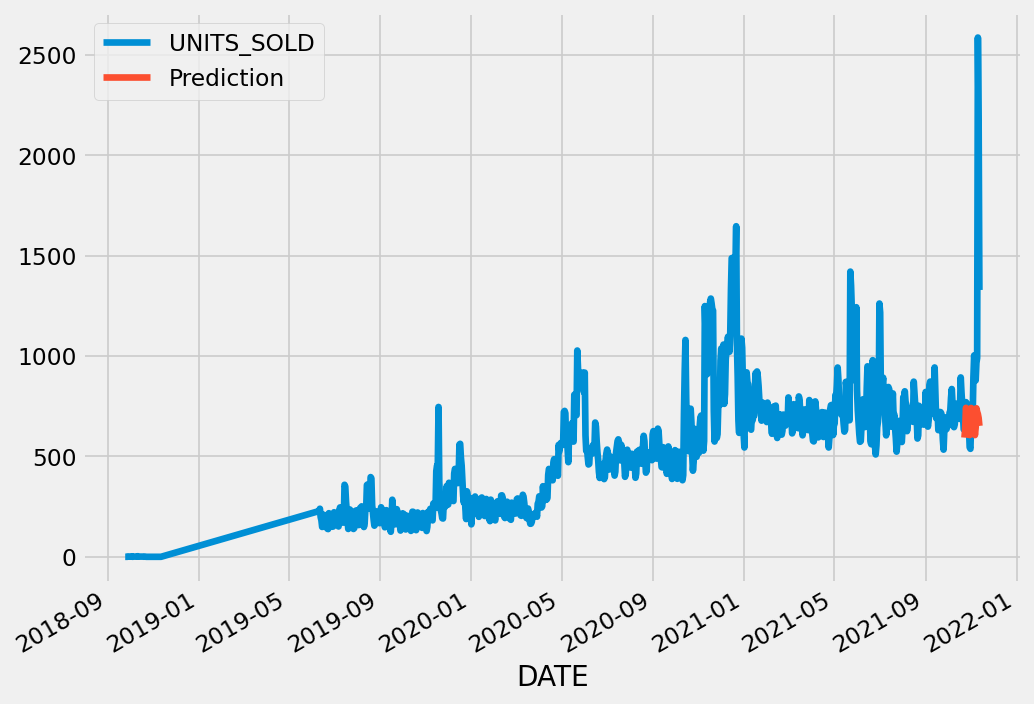

In [34]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
pd.concat([final_df['UNITS_SOLD'],forecast_df],axis=1).plot()

A linha azul representa a quantidade que de fato foi vendida no período e a linha laranja é a previsão estimada pelo modelo ARIMA. 
Os resultados do modelo conseguem estimar um determinado período ao final de 2021, entretanto não apresentam bom desempenho quando o comportamento sazonal atípico ocorre. Ainda assim farei uma tentativa de prever valores futuros com este modelo.

### 3.1.4. Medidas de Avaliação do Modelo - AUTO ARIMA - Todas Categorias <a class="anchor" id="section_3_1_4"></a>

Para avaliar o modelo foi calculado:
   * RMSE
   * MAE - Mean Absolute Error
   * MAPE - Mean Absolute Percentage Error

In [50]:
MAE_ARIMA = mean_absolute_error(test['UNITS_SOLD'], forecast_df)
MAE_ARIMA

289.93278316610446

In [54]:
MAPE_ARIMA = MAPE(test['UNITS_SOLD'], forecast_df['Prediction'])
MAPE_ARIMA

20.582937157795516

In [55]:
rmse_ARIMA = np.sqrt( np.mean( test['UNITS_SOLD'] - forecast_df['Prediction'] )**2 )
rmse_ARIMA

261.14570244676946

### 3.1.5. Prevendo Futuros valores Desconhecidos - AUTO ARIMA - Todas Categorias <a class="anchor" id="section_3_1_5"></a>

Utilizando o modelo ARIMA criado, irei estimar mais 8 períodos a partir da data de 1° de setembro de 2021.

In [56]:
forecast1=model.predict(n_periods=21, return_conf_int=True)
forecast_range=pd.date_range(start='2021-11-12', periods=21,freq='D')

In [57]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

Os 21 novos períodos previstos são os seguintes:

In [58]:
forecast1_df

,Prediction
2021-11-12,593.534426
2021-11-13,639.915806
2021-11-14,741.756920
2021-11-15,724.023167
2021-11-16,712.696233
2021-11-17,692.921972
2021-11-18,653.712755
2021-11-19,606.184272
2021-11-20,643.326563
2021-11-21,741.281998


<AxesSubplot:>

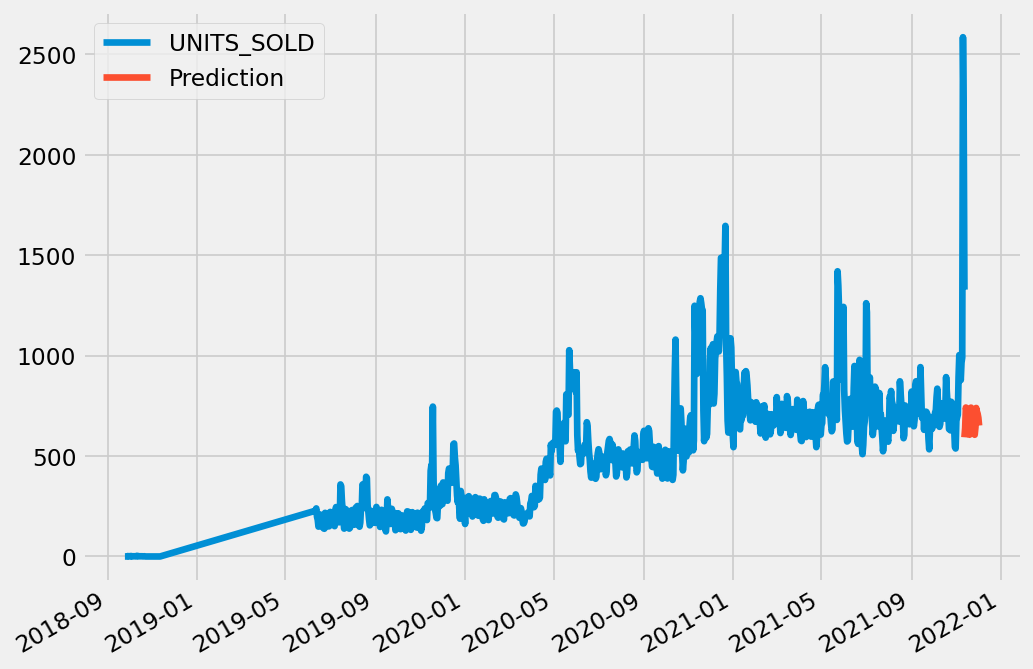

In [59]:
pd.concat([final_df['UNITS_SOLD'],forecast1_df],axis=1).plot()

Observando os dados originais e os previstos temos um resultado semelhante com o desempenho dos dataset treino e teste. Os novos pontos não conseguem acompanhar a tendência sazonal apresentada.

Para alcançar um melhor resultado irei aplicar um algorítmo de redes neurais.

# 4. Trabalhando com Redes Neurais Recorrentes (RNN) <a class="anchor" id="chapter4"></a>

Para previsões diárias da série temporal o modelo Auto Arima não apresentou bom desempenho

Usarei o modelo de Rede Neural Long Short-Term Memory (LSTM), um tipo de Rede Neural Recorrente (RNN) para desenvolver o modelo que irá prever as vendas de maneira diária

## 4.1. Modelo LSTM <a class="anchor" id="section_4_1"></a>

Novamente preparo meu dataset para estar apto a iniciar os trabalhos de previsões em séries temporais

In [60]:
df_day=df.set_index('DATE')
df_day.index = pd.to_datetime(df_day.index)
df_day=df_day.resample('D').mean()
df_day = df_day[df_day['UNITS_SOLD'].notna()]
df_day.shape

(921, 1)

In [61]:
df_day.head()

,UNITS_SOLD
DATE,
2018-09-24,0.0
2018-09-25,0.0
2018-09-27,0.0
2018-09-28,2.0
2018-09-29,1.0


Realizando o gráfico para observarmos a distribuição de unidades vendidas por dia

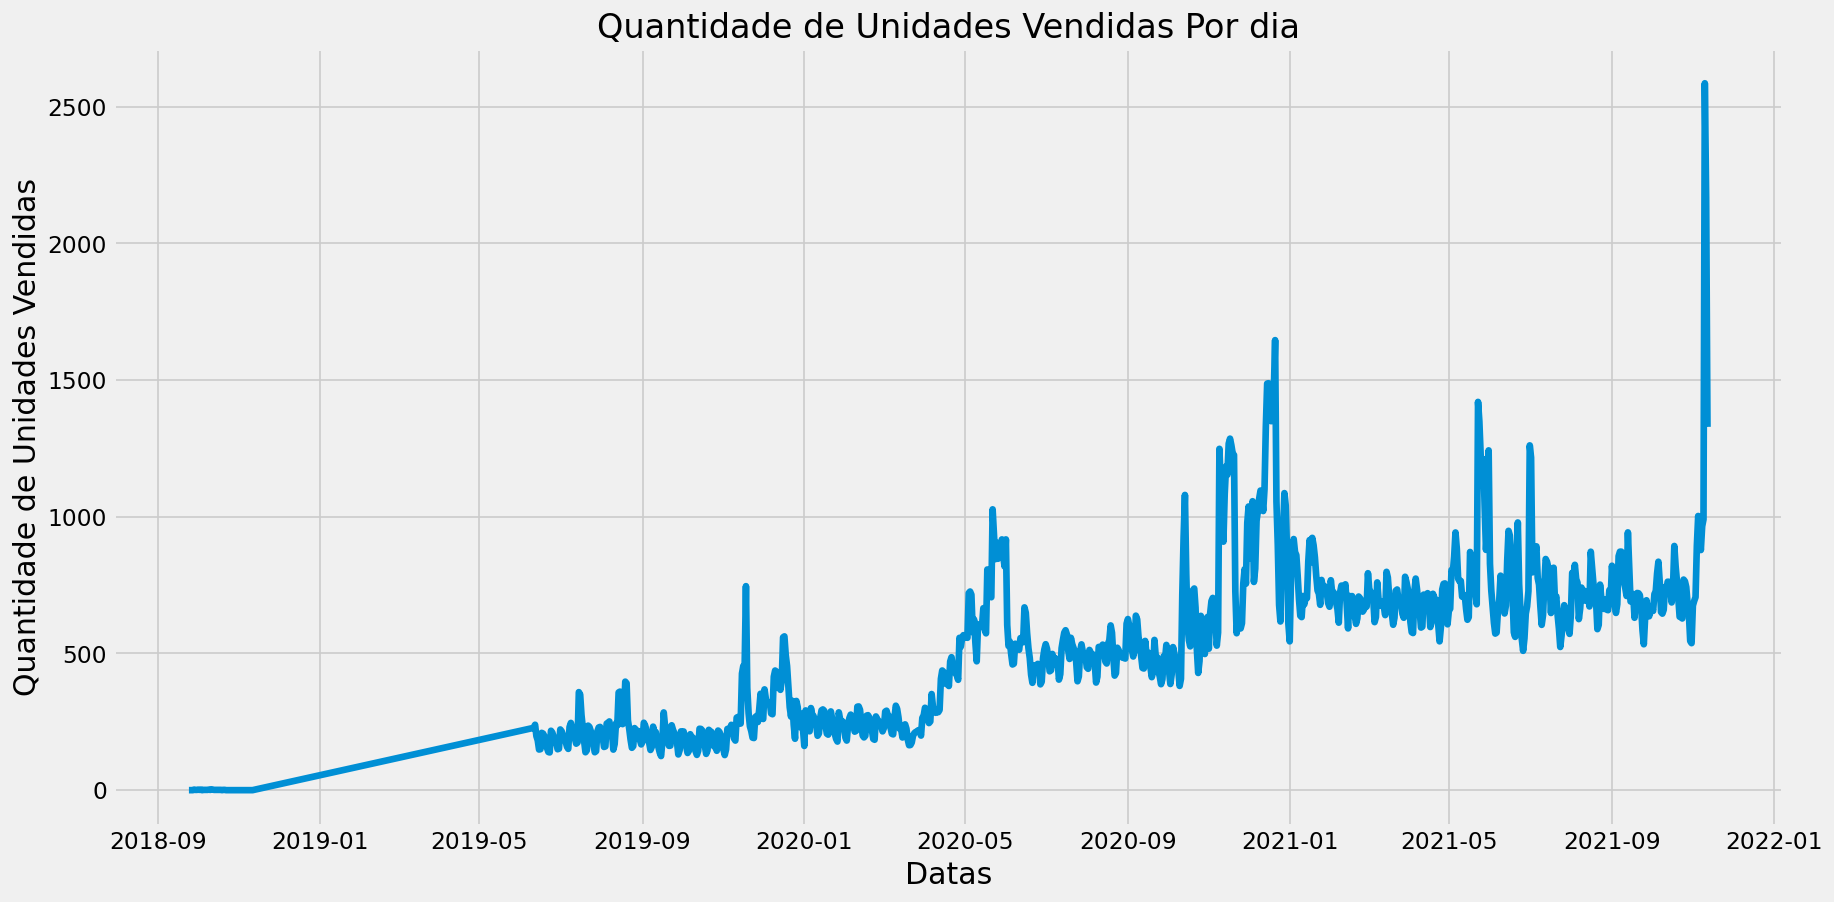

In [62]:
plt.figure(figsize=(16,8))
plt.title('Quantidade de Unidades Vendidas Por dia')
plt.plot(df_day['UNITS_SOLD'])
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas', fontsize=18)
plt.show()

Irei converter meu dataframe em um array para melhor desempenho ao processar o modelo

In [63]:
data = df_day.filter(['UNITS_SOLD'])
dataset = data.values

### 4.1.1. Preparando os dados para o modelo <a class="anchor" id="section_4_1_1"></a>

Separarei 80% dos dados para treino e aplicarei MinMaxScaler para escalonar os dados.

MinMaxScaler subtrai o valor mínimo da variável e depois a divide por um intervalo. O intervalo é a diferença entre o máximo original e o mínimo original.
O MinMaxScaler preserva a forma da distribuição original. Não altera de forma significativa a informação incorporada nos dados originais.

Algorítmos de Machine Learning e Deep Learning funcionam melhor quando as features estão escalonadas.

In [64]:
training_data_len = math.ceil( len(dataset) * 0.8 )
training_data_len

737

In [65]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [66]:
scaled_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [7.73395205e-04],
       [3.86697602e-04],
       [3.86697602e-04],
       [7.73395205e-04],
       [3.86697602e-04],
       [7.73395205e-04],
       [0.00000000e+00],
       [3.86697602e-04],
       [3.86697602e-04],
       [3.86697602e-04],
       [3.86697602e-04],
       [7.73395205e-04],
       [3.86697602e-04],
       [1.16009281e-03],
       [7.73395205e-04],
       [3.86697602e-04],
       [3.86697602e-04],
       [3.86697602e-04],
       [3.86697602e-04],
       [3.86697602e-04],
       [0.00000000e+00],
       [3.86697602e-04],
       [3.86697602e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [8.81670534e-02],
       [9.25496262e-02],
       [7.64372261e-02],
       [7.05078629e-02],
       [5.74890436e-02],


Criando o dataset de treino

In [67]:
train_data = scaled_data[0:training_data_len, :]
len(train_data)

737

Dividindo o dataset em x_train e y_train

In [68]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #Will conaint 60 values (0-59)
  y_train.append(train_data[i, 0]) #Will contain the 61th value (60)
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.        , 0.        , 0.0007734 , 0.0003867 ,
       0.0003867 , 0.0007734 , 0.0003867 , 0.0007734 , 0.        ,
       0.0003867 , 0.0003867 , 0.0003867 , 0.0003867 , 0.0007734 ,
       0.0003867 , 0.00116009, 0.0007734 , 0.0003867 , 0.0003867 ,
       0.0003867 , 0.0003867 , 0.0003867 , 0.        , 0.0003867 ,
       0.0003867 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08816705, 0.09254963, 0.07643723, 0.07050786, 0.05748904,
       0.05787574, 0.0810776 , 0.0800464 , 0.07656613, 0.07037896,
       0.05968033, 0.05400877, 0.05336427, 0.08404228, 0.0813354 ,
       0.07566383, 0.06715648, 0.06702758, 0.05787574, 0.05864914,
       0.08584687, 0.08339778, 0.07824181, 0.07489044, 0.06921887])]
[0.06174271719515339]



In [69]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(677, 60, 1)

### 4.1.2. Construindo o Modelo LSTM <a class="anchor" id="section_4_1_2"></a>

In [70]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2022-08-04 19:57:05.435197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Compilando o modelo com o otimizador Adam

In [71]:
model.compile(optimizer='adam', loss='mean_squared_error')

Treinando o Modelo com os seguintes parametros:
* batch_size = 1
* epochs = 1

In [72]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

677/677 [==============================] - 22s 29ms/step - loss: 0.0037


### 4.1.3. Calculando as Predições com LSTM <a class="anchor" id="section_4_1_3"></a>

Nos Próximos passos irei realizar os seguintes procedimentos para calcular as predições com o modelo LSTM
* Converter os dados do dataset de teste em um array
* Realizar o Reshape no array
* Calcular as predições

In [73]:
test_data = scaled_data[training_data_len - 60:]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [74]:
x_test = np.array(x_test)

In [75]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [76]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

6/6 [==============================] - 1s 22ms/step


array([[ 709.8196 ],
       [ 698.00214],
       [ 683.37585],
       [ 665.5114 ],
       [ 649.63806],
       [ 661.7423 ],
       [ 681.6504 ],
       [ 698.8424 ],
       [ 711.723  ],
       [ 712.56647],
       [ 703.65906],
       [ 770.825  ],
       [ 853.4928 ],
       [ 918.7242 ],
       [ 955.81305],
       [ 986.6511 ],
       [ 990.5511 ],
       [ 966.45013],
       [ 944.3365 ],
       [ 955.60925],
       [ 933.68085],
       [ 892.3542 ],
       [ 842.25006],
       [ 789.06476],
       [ 737.68085],
       [ 694.2776 ],
       [ 668.07025],
       [ 656.86096],
       [ 663.0188 ],
       [ 665.1857 ],
       [ 666.4156 ],
       [ 661.79236],
       [ 658.0184 ],
       [ 672.0651 ],
       [ 703.27875],
       [ 735.85034],
       [ 757.0764 ],
       [ 754.72546],
       [ 728.4041 ],
       [ 693.5248 ],
       [ 685.276  ],
       [ 707.3867 ],
       [ 715.78894],
       [ 707.74243],
       [ 682.5292 ],
       [ 648.757  ],
       [ 620.2729 ],
       [ 606.

### 4.1.4. Medidas de Avaliação do Modelo <a class="anchor" id="section_4_1_4"></a>

Para avaliar o modelo foi calculado:
   * RMSE
   * MAE - Mean Absolute Error
   * MAPE - Mean Absolute Percentage Error

In [77]:
MAE_full = mean_absolute_error(y_test, predictions)
MAE_full

119.03082297504812

In [78]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [79]:
MAPE_full = MAPE(y_test, predictions)
MAPE_full

13.395170444937547

In [80]:
rmse_full = np.sqrt( np.mean( predictions - y_test )**2 )
rmse_full

71.44135870449784

/var/folders/9y/7bgc1sx94m72s14g9jk5ccfw0000gn/T/ipykernel_5410/1407182795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


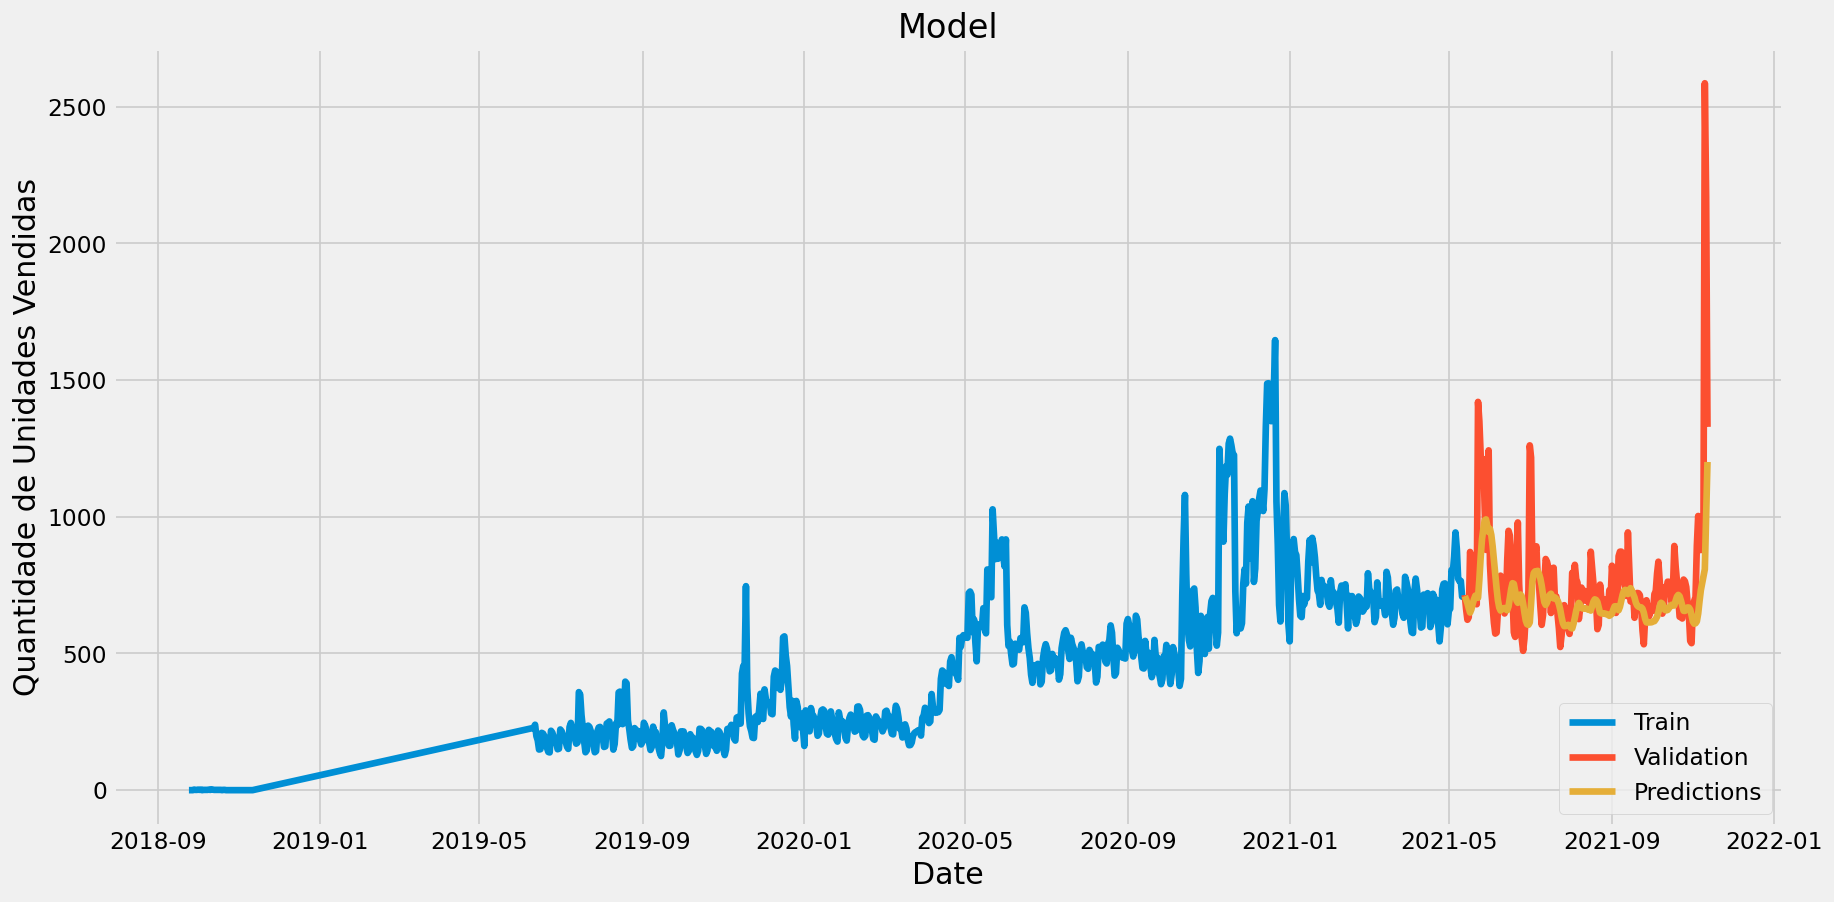

In [81]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas', fontsize=18)
plt.plot(train['UNITS_SOLD'])
plt.plot(valid[['UNITS_SOLD', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

## 4.2. Modelo LSTM apenas para o ano 2021 <a class="anchor" id="section_4_2"></a>

Para tentar melhorar o desempenho do modelo irei produzir um novo modelo apenas com os dados do ano de 2021.

In [82]:
df_2021=df.set_index('DATE')
df_2021.index = pd.to_datetime(df_2021.index)
df_2021=df_2021.resample('D').mean()
df_2021 = df_2021[(df_2021.index.get_level_values(0) > '2020-12-31')]
df_2021 = df_2021[df_day['UNITS_SOLD'].notna()]

df_2021.shape

/var/folders/9y/7bgc1sx94m72s14g9jk5ccfw0000gn/T/ipykernel_5410/2023812098.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2021 = df_2021[df_day['UNITS_SOLD'].notna()]


(316, 1)

In [83]:
df_2021.head()

,UNITS_SOLD
DATE,
2021-01-01,544.333333
2021-01-02,782.000000
2021-01-03,832.000000
2021-01-04,918.666667
2021-01-05,871.333333


Realizando o gráfico para observarmos a distribuição de unidades vendidas por dia

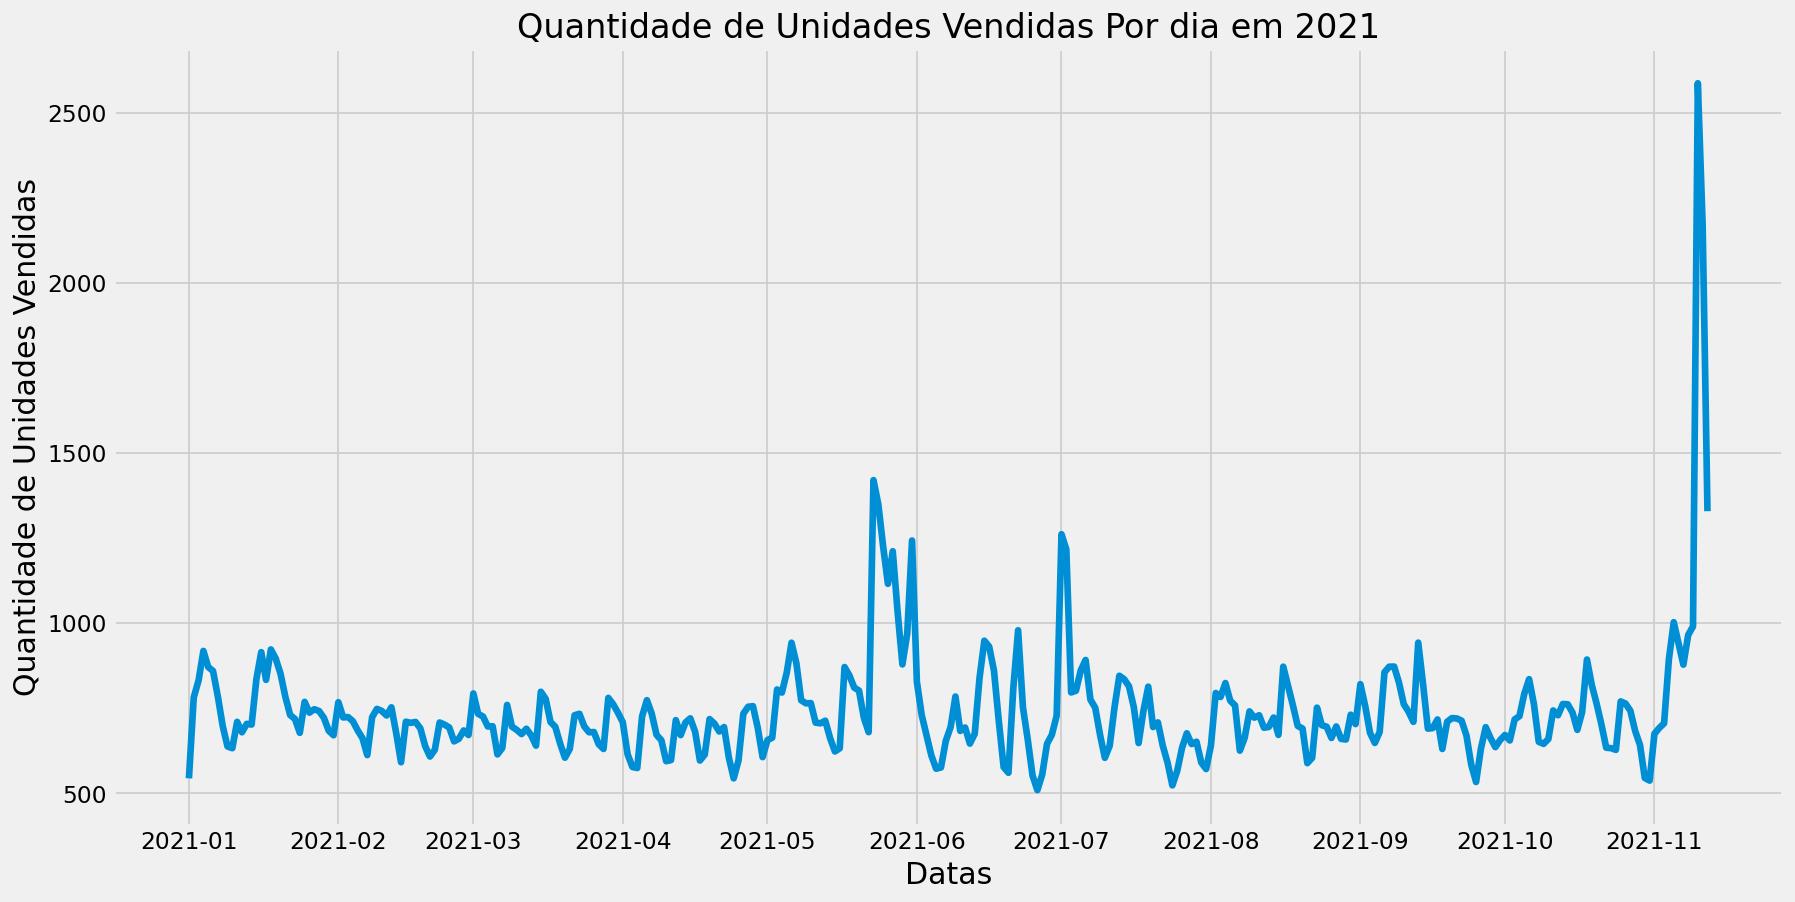

In [84]:
plt.figure(figsize=(16,8))
plt.title('Quantidade de Unidades Vendidas Por dia em 2021')
plt.plot(df_2021['UNITS_SOLD'])
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas', fontsize=18)
plt.show()

Irei converter meu dataframe em um array para melhor desempenho ao processar o modelo

In [85]:
data2021 = df_2021.filter(['UNITS_SOLD'])
dataset2021 = data2021.values

### 4.2.1. Preparando os dados para o modelo 2021 <a class="anchor" id="section_4_2_1"></a>

In [86]:
training_data_len2021 = math.ceil( len(dataset2021) * 0.8 )
training_data_len2021

253

In [87]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data2021 = scaler.fit_transform(dataset2021)

In [88]:
scaled_data2021

array([[0.0166961 ],
       [0.1311607 ],
       [0.15524161],
       [0.19698186],
       [0.17418526],
       [0.16856638],
       [0.13244502],
       [0.09102585],
       [0.06180767],
       [0.05939958],
       [0.09664473],
       [0.0818751 ],
       [0.09375502],
       [0.09279178],
       [0.15716808],
       [0.19521593],
       [0.15604431],
       [0.19906887],
       [0.18622572],
       [0.16471344],
       [0.13212394],
       [0.10627709],
       [0.10065821],
       [0.0810724 ],
       [0.12489966],
       [0.10964842],
       [0.1144646 ],
       [0.11189597],
       [0.10226361],
       [0.08396211],
       [0.07770108],
       [0.12441804],
       [0.10290576],
       [0.10338738],
       [0.09760796],
       [0.08460427],
       [0.07352705],
       [0.04960668],
       [0.10322684],
       [0.11494622],
       [0.11205651],
       [0.10563493],
       [0.11719377],
       [0.08059079],
       [0.0394927 ],
       [0.09680527],
       [0.09519987],
       [0.096

In [89]:
train_data2021 = scaled_data2021[0:training_data_len2021, :]
len(train_data2021)

253

Dividindo o dataset em x_train e y_train

In [90]:
x_train2021 = []
y_train2021 = []
for i in range(60, len(train_data2021)):
  x_train2021.append(train_data2021[i-60:i, 0]) 
  y_train2021.append(train_data2021[i, 0]) 
  if i <= 60:
    print(x_train2021)
    print(y_train2021)
    print()

[array([0.0166961 , 0.1311607 , 0.15524161, 0.19698186, 0.17418526,
       0.16856638, 0.13244502, 0.09102585, 0.06180767, 0.05939958,
       0.09664473, 0.0818751 , 0.09375502, 0.09279178, 0.15716808,
       0.19521593, 0.15604431, 0.19906887, 0.18622572, 0.16471344,
       0.13212394, 0.10627709, 0.10065821, 0.0810724 , 0.12489966,
       0.10964842, 0.1144646 , 0.11189597, 0.10226361, 0.08396211,
       0.07770108, 0.12441804, 0.10290576, 0.10338738, 0.09760796,
       0.08460427, 0.07352705, 0.04960668, 0.10322684, 0.11494622,
       0.11205651, 0.10563493, 0.11719377, 0.08059079, 0.0394927 ,
       0.09680527, 0.09519987, 0.09648419, 0.08749398, 0.06244983,
       0.04751967, 0.05699149, 0.09568149, 0.09279178, 0.08861776,
       0.06903195, 0.07272435, 0.08444373, 0.07802215, 0.13677958])]
[0.10788248515010432]



In [91]:
x_train2021, y_train2021 = np.array(x_train2021), np.array(y_train2021)
x_train2021 = np.reshape(x_train2021, (x_train2021.shape[0], x_train2021.shape[1], 1))
x_train2021.shape

(193, 60, 1)

### 4.2.2. Construindo o Modelo LSTM - 2021<a class="anchor" id="section_4_2_2"></a>

In [92]:
model2021 = Sequential()
model2021.add(LSTM(50, return_sequences=True, input_shape=(x_train2021.shape[1], 1)))
model2021.add(LSTM(50, return_sequences=False))
model2021.add(Dense(25))
model2021.add(Dense(1))

Compilando o modelo com o otimizador Adam

In [93]:
model2021.compile(optimizer='adam', loss='mean_squared_error')

Treinando o Modelo com os seguintes parametros:
* batch_size = 1
* epochs = 1

In [94]:
model2021.fit(x_train2021, y_train2021, batch_size=1, epochs=1)

193/193 [==============================] - 8s 28ms/step - loss: 0.0054


### 4.2.3. Calculando as Predições com LSTM - 2021 <a class="anchor" id="section_4_2_3"></a>

Nos Próximos passos irei realizar os seguintes procedimentos para calcular as predições com o modelo LSTM
* Converter os dados do dataset de teste em um array
* Realizar o Reshape no array
* Calcular as predições

In [95]:
test_data2021 = scaled_data2021[training_data_len2021 - 60:]
x_test2021 = []
y_test2021 = dataset2021[training_data_len2021:, :]
for i in range(60, len(test_data2021)):
  x_test2021.append(test_data2021[i-60:i, 0])

In [96]:
x_test2021 = np.array(x_test2021)

In [97]:
x_test2021 = np.reshape(x_test2021, (x_test2021.shape[0], x_test2021.shape[1], 1))

In [98]:
predictions2021 = model2021.predict(x_test2021)
predictions2021 = scaler.inverse_transform(predictions2021)
predictions2021

2/2 [==============================] - 1s 24ms/step


array([[798.66565],
       [796.864  ],
       [793.04395],
       [797.17346],
       [799.76434],
       [796.6817 ],
       [791.6433 ],
       [787.31354],
       [780.7616 ],
       [777.0131 ],
       [775.35004],
       [774.80383],
       [774.6034 ],
       [773.0565 ],
       [768.09564],
       [760.549  ],
       [756.3735 ],
       [756.46545],
       [757.2901 ],
       [757.41693],
       [757.9945 ],
       [759.2204 ],
       [760.0052 ],
       [762.69586],
       [766.1923 ],
       [771.91376],
       [779.3575 ],
       [783.9188 ],
       [782.6654 ],
       [778.84125],
       [774.8897 ],
       [774.3693 ],
       [774.8869 ],
       [776.976  ],
       [779.44025],
       [780.8704 ],
       [779.84076],
       [779.7517 ],
       [785.5702 ],
       [790.4665 ],
       [792.37476],
       [790.53394],
       [784.8662 ],
       [778.25   ],
       [771.9166 ],
       [771.62726],
       [773.7621 ],
       [775.95013],
       [775.7747 ],
       [773.144  ],


### 4.2.4. Medidas de Avaliação do Modelo 2021 <a class="anchor" id="section_4_2_4"></a>

Para avaliar o modelo foi calculado:
   * RMSE
   * MAE - Mean Absolute Error
   * MAPE - Mean Absolute Percentage Error

In [99]:
MAE2021 = mean_absolute_error(y_test2021, predictions2021)
MAE2021

144.14059755032656

In [100]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [101]:
MAPE2021 = MAPE(y_test2021, predictions2021)
MAPE2021

15.41748331877321

In [102]:
rmse2021 = np.sqrt( np.mean( predictions2021 - y_test2021 )**2 )
rmse2021

7.203987565620869

/var/folders/9y/7bgc1sx94m72s14g9jk5ccfw0000gn/T/ipykernel_5410/3803655833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid2021['Predictions'] = predictions2021


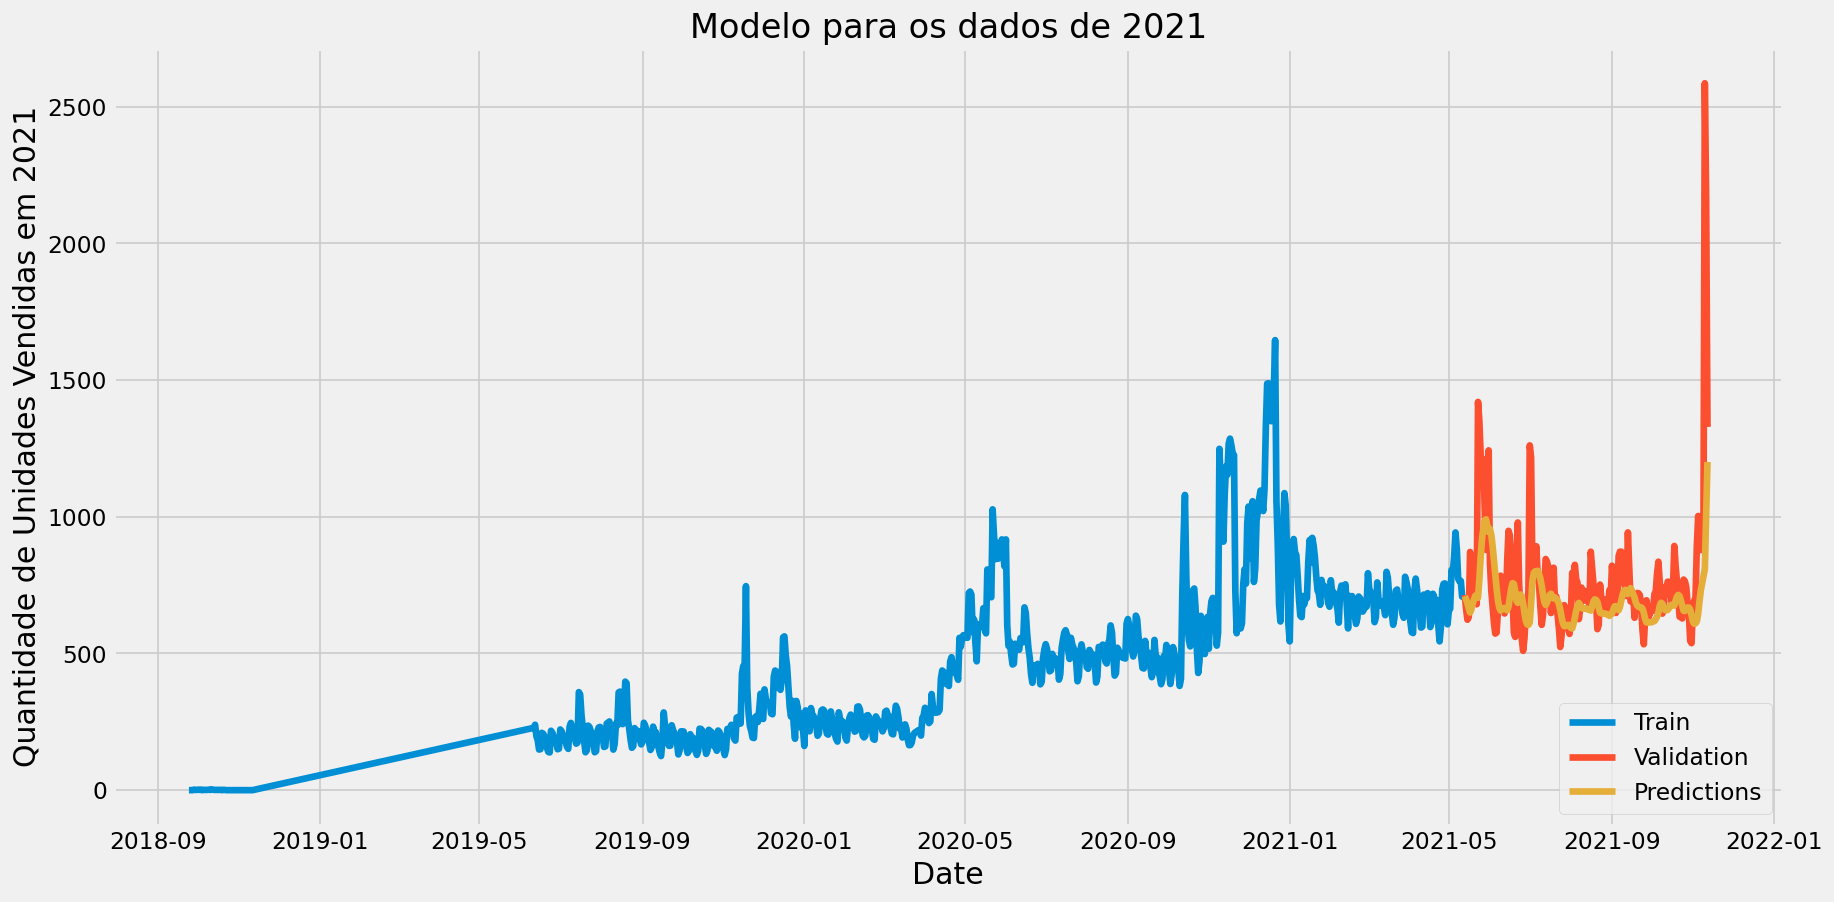

In [109]:
train2021 = data2021[:training_data_len2021]
valid2021 = data2021[training_data_len2021:]
valid2021['Predictions'] = predictions2021
plt.figure(figsize=(16,8))
plt.title('Modelo para os dados de 2021')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas em 2021', fontsize=18)
plt.plot(train['UNITS_SOLD'])
plt.plot(valid[['UNITS_SOLD', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

## 4.3. Comparando os dois modelos - Todas Categorias <a class="anchor" id="section_4_3"></a>

In [106]:
print(MAE_ARIMA, MAE_full, MAE2021)

289.93278316610446 119.03082297504812 144.14059755032656


In [108]:
print(MAPE_ARIMA, MAPE_full, MAPE2021)

20.582937157795516 13.395170444937547 15.41748331877321


In [107]:
print(rmse_ARIMA, rmse_full, rmse2021)

261.14570244676946 71.44135870449784 7.203987565620869


| MODELO | MAE | MAPE | RMSE |
| --- | --- | --- | --- |
| ARIMA | 289.93 | 20.58 | 261.14 |
| LSTM Full | 119.03 | 13.39 | 71.44 |
| LSTM 2021 | 114.14 | 15.41 | 7.20 |

Comparando os dois modelos vemos que o melhor desempenho provém dos modelos LSTM, em especial do que contém informações apenas de 2021.

É este modelo que usaremos para prever os próximos 21 dias

# 5. Previsão dos próximos 21 dias - Todas Categorias  <a class="anchor" id="chapter5"></a>

In [203]:
X_FUTURE = 21
predictions = np.array([])
last = x_test2021[-1]
for i in range(X_FUTURE):
  curr_prediction = model2021.predict(np.array([last]))
  print(curr_prediction)
  last = np.concatenate([last[1:], curr_prediction])
  predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = scaler.inverse_transform([predictions])[0]
print(predictions)

1/1 [==============================] - 0s 59ms/step
[[0.21354508]]
1/1 [==============================] - 0s 54ms/step
[[0.21893461]]
1/1 [==============================] - 0s 75ms/step
[[0.21317618]]
1/1 [==============================] - 0s 55ms/step
[[0.20301908]]
1/1 [==============================] - 0s 63ms/step
[[0.19186163]]
1/1 [==============================] - 0s 73ms/step
[[0.18131733]]
1/1 [==============================] - 0s 59ms/step
[[0.17206025]]
1/1 [==============================] - 0s 58ms/step
[[0.1642808]]
1/1 [==============================] - 0s 74ms/step
[[0.15793233]]
1/1 [==============================] - 0s 58ms/step
[[0.15286286]]
1/1 [==============================] - 0s 52ms/step
[[0.14888495]]
1/1 [==============================] - 0s 58ms/step
[[0.14581077]]
1/1 [==============================] - 0s 47ms/step
[[0.14346863]]
1/1 [==============================] - 0s 46ms/step
[[0.14170952]]
1/1 [==============================] - 0s 67ms/step
[[0.1404081

In [204]:
import datetime
from datetime import timedelta
dicts = []
curr_date = data2021.index[-1]
for i in range(X_FUTURE):
  curr_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")

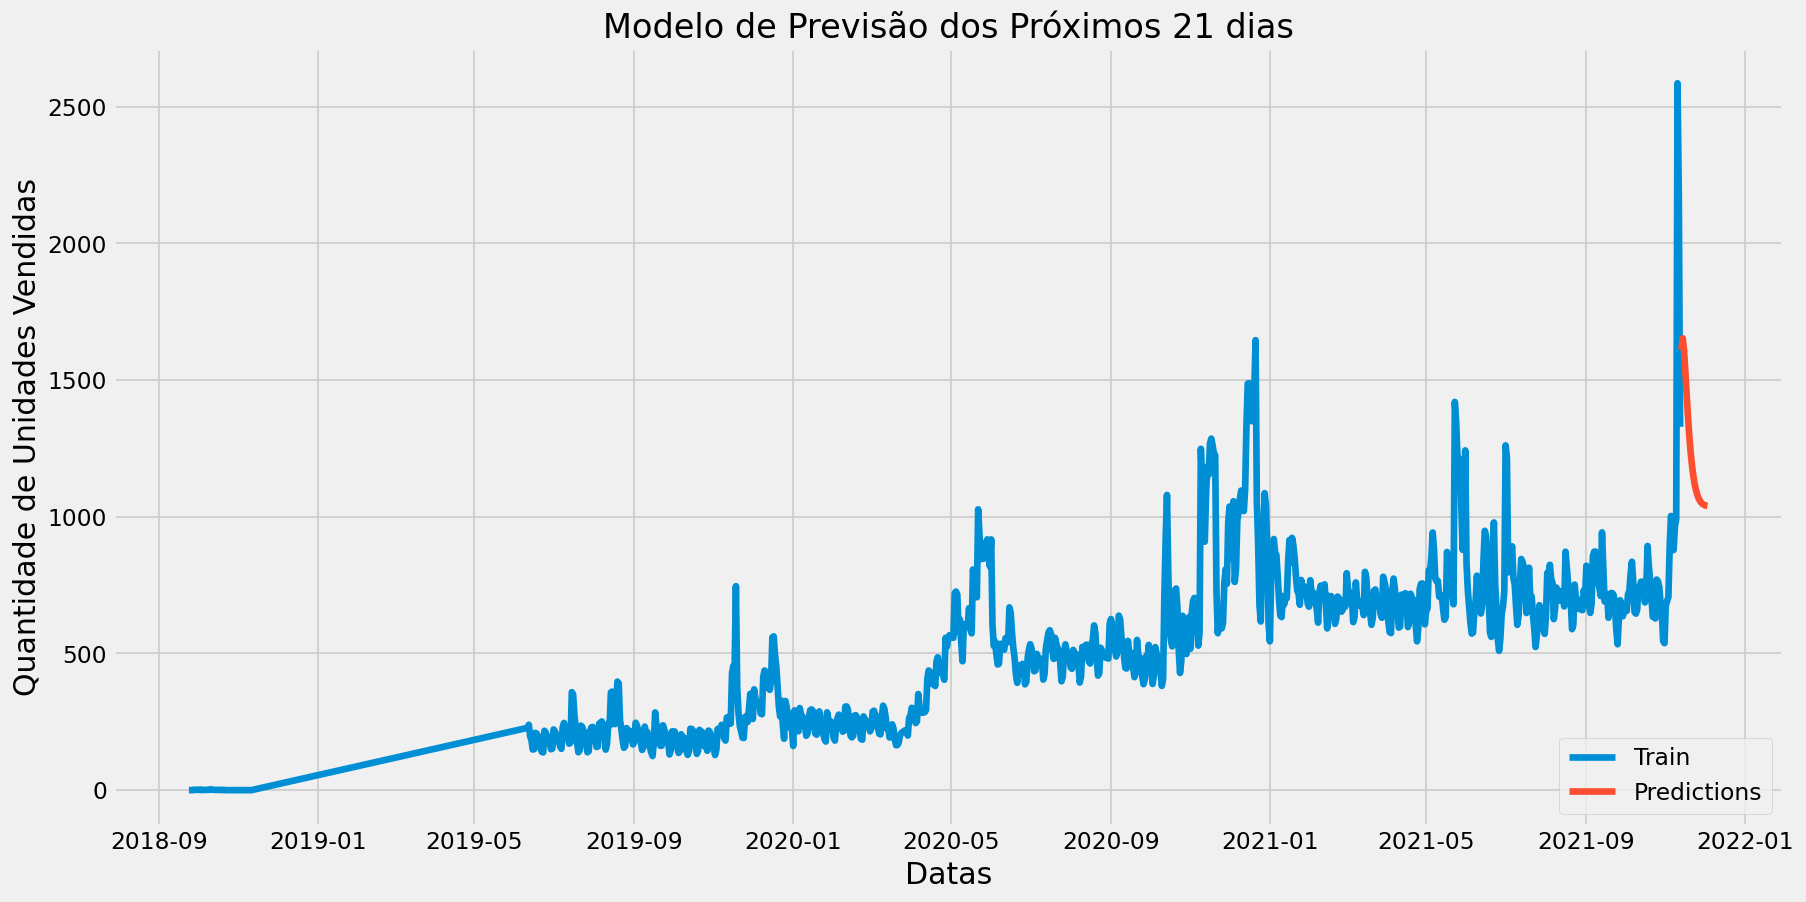

In [205]:
train2021 = data
plt.figure(figsize=(16,8))
plt.title('Modelo de Previsão dos Próximos 21 dias')
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas', fontsize=18)
plt.plot(train2021['UNITS_SOLD'])
plt.plot(new_data['Predictions'])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()

A intepretação do modelo para previsão dos próximos 21 dias pode seguir dois caminhos:
* ou o modelo não consegue acompanhar a sazonalidade ou evento atípico que ocorreu;
* ou o modelo está corrigindo o evento atípico fazendo uma previsão de queda de vendas nos próximos dias.

De qualquer maneira é preciso investigar um pouco mais a fundo a qual a origem deste pico de vendas no final do período estudado. Para isso irei realizar a modelagem dos dados para cada uma das categorias presentes, de forma separada e utilizando o LSTM.

# 6. Modelos por Categorias Usando LSTM <a class="anchor" id="chapter6"></a>

## 6.1. Categoria 1 - Modelo LSTM <a class="anchor" id="section_6_1"></a>

Novamente preparo meu dataset para estar apto a iniciar os trabalhos de previsões em séries temporais

In [445]:
df = pd.read_csv('series.csv')
cat1 = df[df["CATEGORY"] == 'CATEG-1']
cat1=cat1.set_index('DATE')
cat1.index = pd.to_datetime(cat1.index)
cat1=cat1.resample('D').mean()
cat1 = cat1[cat1['UNITS_SOLD'].notna()]
cat1.shape

(887, 1)

Realizando o gráfico para observarmos a distribuição de unidades vendidas por dia dos items Categoria 1. Há picos de sazonalidade, mas a escala do gráfico e a similaridade entre os picos não indicam que a categoria 1 seja a origem da grande disparada de vendas.

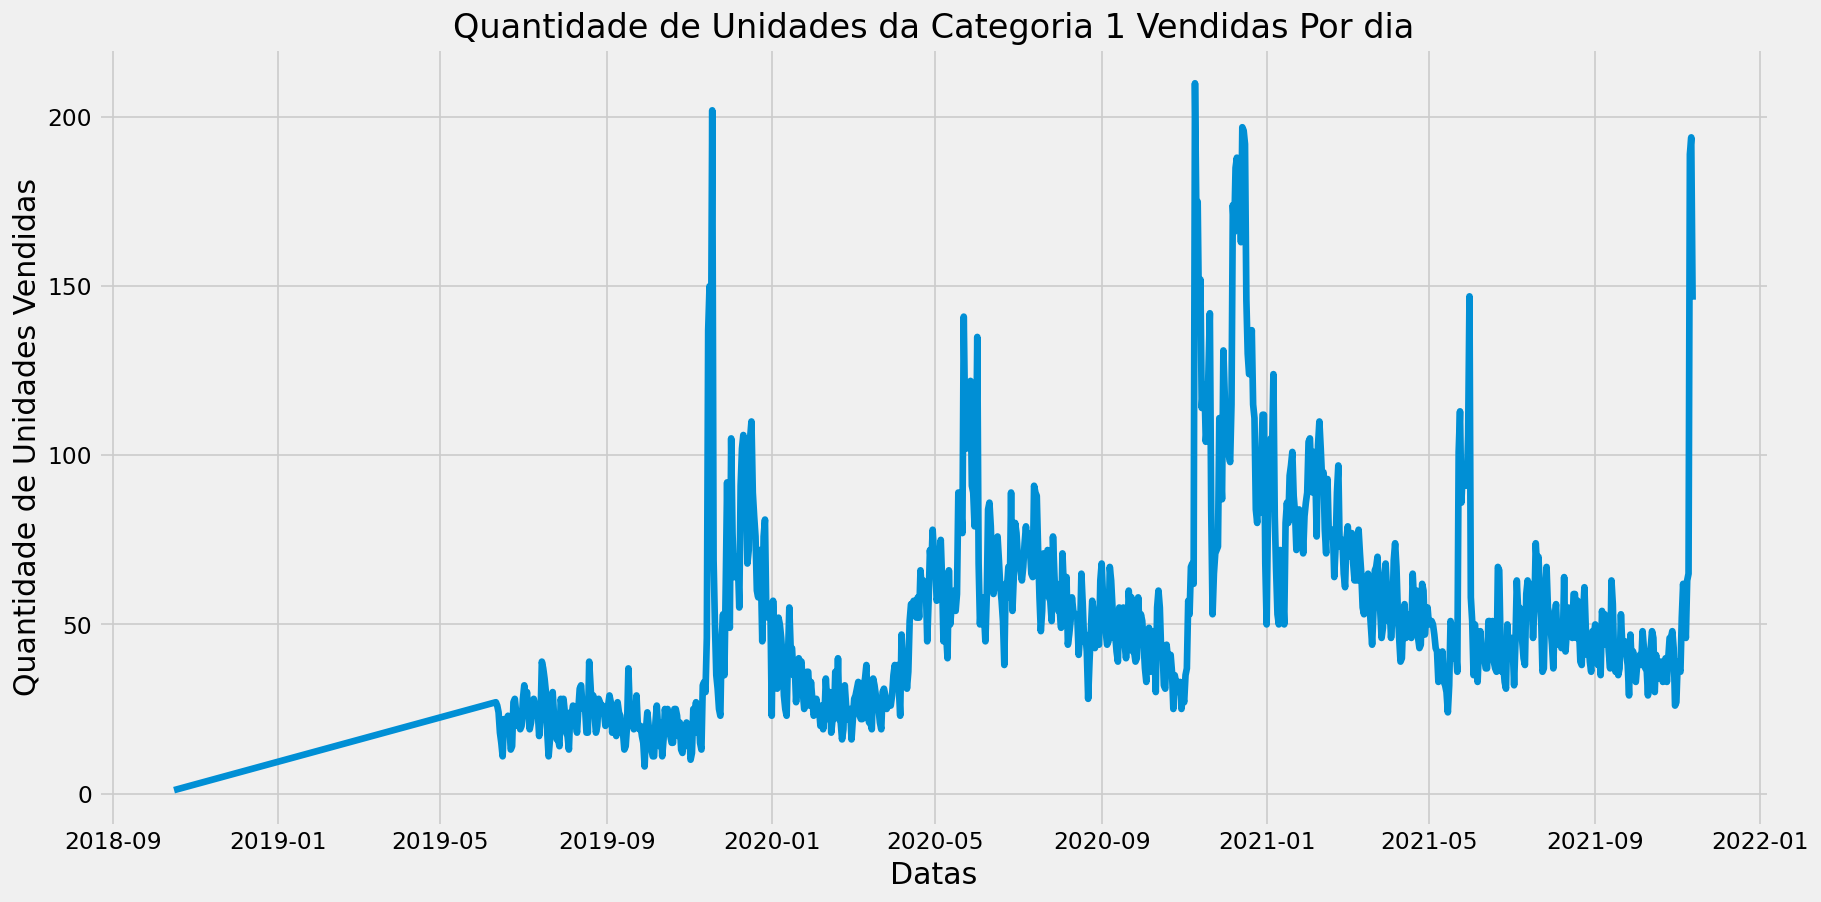

In [446]:
plt.figure(figsize=(16,8))
plt.title('Quantidade de Unidades da Categoria 1 Vendidas Por dia')
plt.plot(cat1['UNITS_SOLD'])
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas', fontsize=18)
plt.show()

Irei converter meu dataframe em um array para melhor desempenho ao processar o modelo

In [447]:
data_cat1 = cat1.filter(['UNITS_SOLD'])
dataset_cat1 = data_cat1.values

### 6.1.1. Preparando os dados para o modelo - Categoria 1 <a class="anchor" id="section_6_1_1"></a>

In [448]:
training_data_len_cat1 = math.ceil( len(dataset_cat1) * 0.8 )
training_data_len_cat1

710

In [449]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_cat1 = scaler.fit_transform(dataset_cat1)

In [450]:
scaled_data_cat1

array([[0.        ],
       [0.12440191],
       [0.11961722],
       [0.11004785],
       [0.08133971],
       [0.06698565],
       [0.04784689],
       [0.10047847],
       [0.0861244 ],
       [0.10047847],
       [0.10526316],
       [0.09090909],
       [0.05741627],
       [0.06220096],
       [0.12440191],
       [0.1291866 ],
       [0.11004785],
       [0.09090909],
       [0.10526316],
       [0.0861244 ],
       [0.09090909],
       [0.1291866 ],
       [0.14832536],
       [0.12440191],
       [0.13875598],
       [0.10526316],
       [0.0861244 ],
       [0.09569378],
       [0.11483254],
       [0.1291866 ],
       [0.11961722],
       [0.10526316],
       [0.11004785],
       [0.07655502],
       [0.10047847],
       [0.18181818],
       [0.1722488 ],
       [0.15789474],
       [0.13875598],
       [0.08133971],
       [0.04784689],
       [0.07177033],
       [0.12440191],
       [0.13875598],
       [0.10526316],
       [0.09569378],
       [0.07177033],
       [0.071

Criando o dataset de treino

In [451]:
train_data_cat1 = scaled_data_cat1[0:training_data_len_cat1, :]
len(train_data_cat1)

710

Dividindo o dataset em x_train e y_train

In [452]:
x_train_cat1 = []
y_train_cat1 = []
for i in range(60, len(train_data_cat1)):
  x_train_cat1.append(train_data_cat1[i-60:i, 0]) #Will conaint 60 values (0-59)
  y_train_cat1.append(train_data_cat1[i, 0]) #Will contain the 61th value (60)
  if i <= 60:
    print(x_train_cat1)
    print(y_train_cat1)
    print()

[array([0.        , 0.12440191, 0.11961722, 0.11004785, 0.08133971,
       0.06698565, 0.04784689, 0.10047847, 0.0861244 , 0.10047847,
       0.10526316, 0.09090909, 0.05741627, 0.06220096, 0.12440191,
       0.1291866 , 0.11004785, 0.09090909, 0.10526316, 0.0861244 ,
       0.09090909, 0.1291866 , 0.14832536, 0.12440191, 0.13875598,
       0.10526316, 0.0861244 , 0.09569378, 0.11483254, 0.1291866 ,
       0.11961722, 0.10526316, 0.11004785, 0.07655502, 0.10047847,
       0.18181818, 0.1722488 , 0.15789474, 0.13875598, 0.08133971,
       0.04784689, 0.07177033, 0.12440191, 0.13875598, 0.10526316,
       0.09569378, 0.07177033, 0.07177033, 0.06220096, 0.1291866 ,
       0.11483254, 0.1291866 , 0.11004785, 0.08133971, 0.07655502,
       0.05741627, 0.11004785, 0.10526316, 0.11961722, 0.11483254])]
[0.09569377990430622]



In [453]:
x_train_cat1, y_train_cat1 = np.array(x_train_cat1), np.array(y_train_cat1)
x_train_cat1 = np.reshape(x_train_cat1, (x_train_cat1.shape[0], x_train_cat1.shape[1], 1))
x_train_cat1.shape

(650, 60, 1)

### 6.1.2. Construindo o Modelo LSTM - Categoria 1 <a class="anchor" id="section_6_1_2"></a>

In [454]:
model_cat1 = Sequential()
model_cat1.add(LSTM(50, return_sequences=True, input_shape=(x_train_cat1.shape[1], 1)))
model_cat1.add(LSTM(50, return_sequences=False))
model_cat1.add(Dense(25))
model_cat1.add(Dense(1))

Compilando o modelo com o otimizador Adam

In [455]:
model_cat1.compile(optimizer='adam', loss='mean_squared_error')

Treinando o Modelo com os seguintes parametros:
* batch_size = 1
* epochs = 1

In [456]:
model_cat1.fit(x_train_cat1, y_train_cat1, batch_size=1, epochs=1)

650/650 [==============================] - 23s 31ms/step - loss: 0.0119


### 6.1.3. Calculando as Predições com LSTM - Categoria 1 <a class="anchor" id="section_6_1_3"></a>

Nos Próximos passos irei realizar os seguintes procedimentos para calcular as predições com o modelo LSTM
* Converter os dados do dataset de teste em um array
* Realizar o Reshape no array
* Calcular as predições

In [457]:
test_data_cat1 = scaled_data_cat1[training_data_len_cat1 - 60:]
x_test_cat1 = []
y_test_cat1 = dataset_cat1[training_data_len_cat1:, :]
for i in range(60, len(test_data_cat1)):
  x_test_cat1.append(test_data_cat1[i-60:i, 0])

In [458]:
x_test_cat1 = np.array(x_test_cat1)

In [459]:
x_test_cat1 = np.reshape(x_test_cat1, (x_test_cat1.shape[0], x_test_cat1.shape[1], 1))

In [460]:
predictions_cat1 = model_cat1.predict(x_test_cat1)
predictions_cat1 = scaler.inverse_transform(predictions_cat1)

6/6 [==============================] - 1s 26ms/step


### 6.1.4. Medidas de Avaliação do Modelo - Categoria 1 <a class="anchor" id="section_6_1_4"></a>

Para avaliar o modelo foi calculado:
   * RMSE
   * MAE - Mean Absolute Error
   * MAPE - Mean Absolute Percentage Error

In [461]:
MAE_cat1 = mean_absolute_error(y_test_cat1, predictions_cat1)
MAE_cat1

11.122791635114595

In [462]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [463]:
MAPE_cat1 = MAPE(y_test_cat1, predictions_cat1)
MAPE_cat1

18.83941121085967

In [464]:
rmse_cat1 = np.sqrt( np.mean( predictions_cat1 - y_test_cat1 )**2 )
rmse_cat1

5.930998829125011

/var/folders/9y/7bgc1sx94m72s14g9jk5ccfw0000gn/T/ipykernel_5410/2527789835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_cat1['Predictions_cat1'] = predictions_cat1


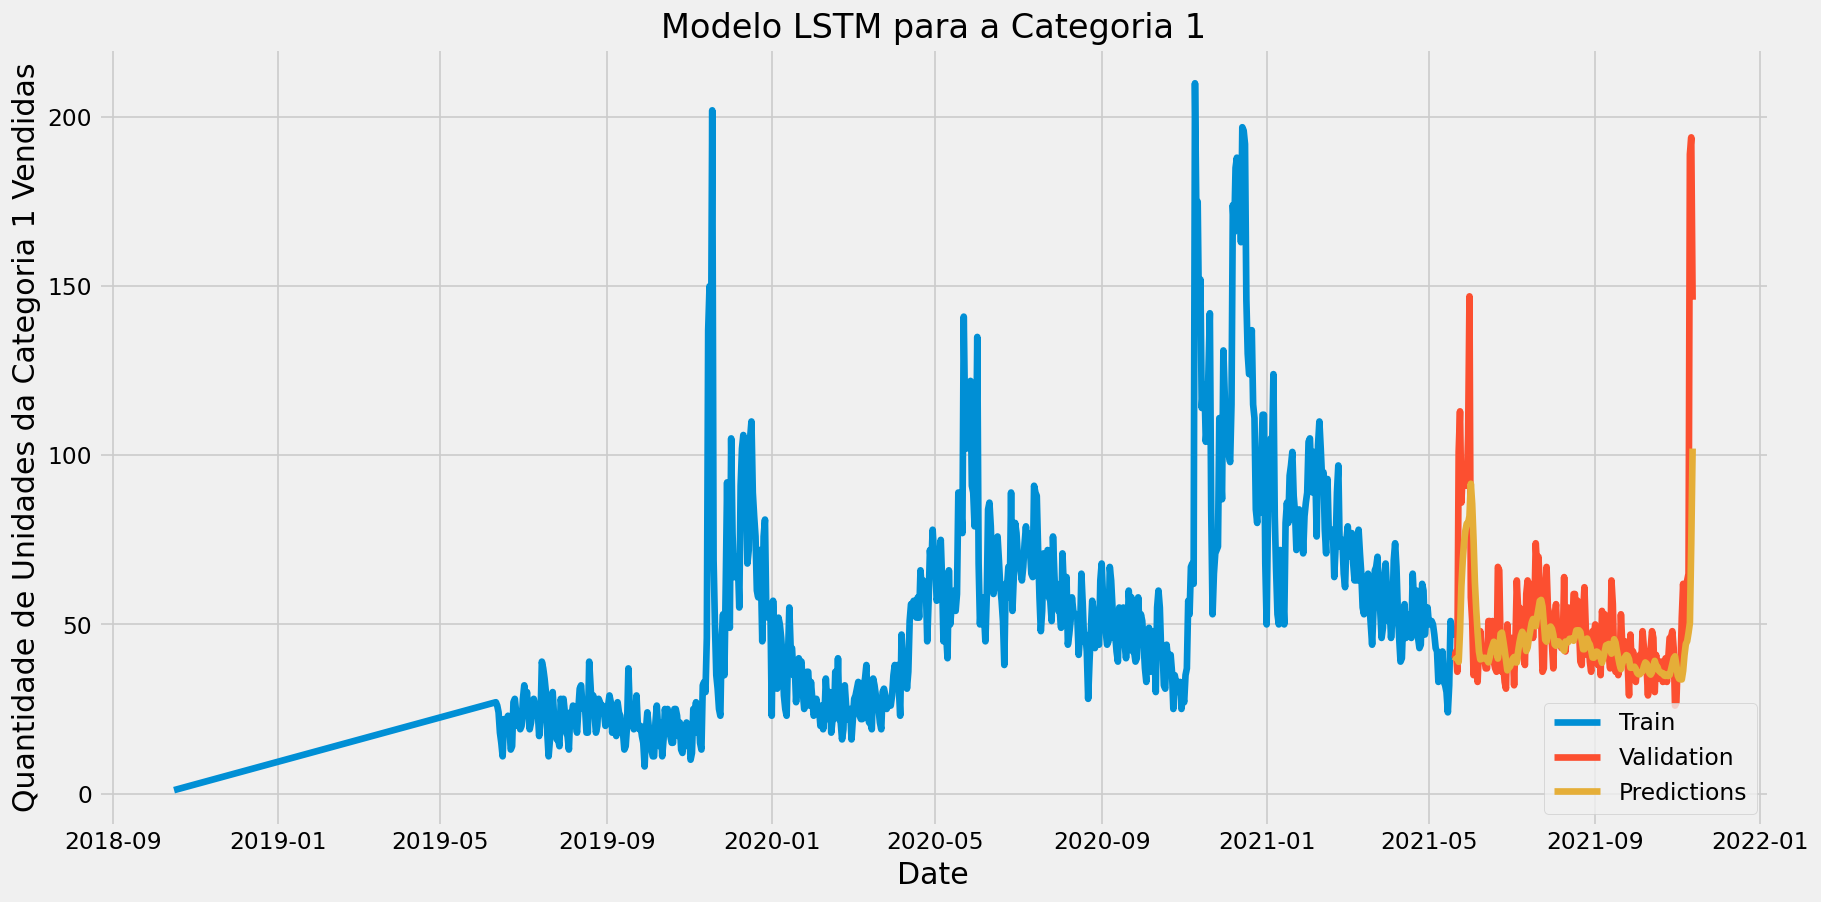

In [465]:
train_cat1 = data_cat1[:training_data_len_cat1]
valid_cat1 = data_cat1[training_data_len_cat1:]
valid_cat1['Predictions_cat1'] = predictions_cat1
plt.figure(figsize=(16,8))
plt.title('Modelo LSTM para a Categoria 1')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Quantidade de Unidades da Categoria 1 Vendidas', fontsize=18)
plt.plot(train_cat1['UNITS_SOLD'])
plt.plot(valid_cat1[['UNITS_SOLD', 'Predictions_cat1']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

O modelo desenvolvido especificamente para a categoria 1 apresenta bons resultados, os quais podem ser observados pelo gráfico acima.

## 6.2. Categoria 2 - Modelo LSTM <a class="anchor" id="section_6_2"></a>

Novamente preparo meu dataset para estar apto a iniciar os trabalhos de previsões em séries temporais

In [396]:
df = pd.read_csv('series.csv')
cat2 = df[df["CATEGORY"] == 'CATEG-2']
cat2=cat2.set_index('DATE')
cat2.index = pd.to_datetime(cat2.index)
cat2=cat2.resample('D').mean()
cat2 = cat2[cat2['UNITS_SOLD'].notna()]
cat2.shape

(879, 1)

As vendas dos produtos categoria 2 também não aparentam ser a origem da disparada de vendas ao final do período. Há nesta categoria dois períodos sazonais que ocorrem por volta dos mezes de março e maio.

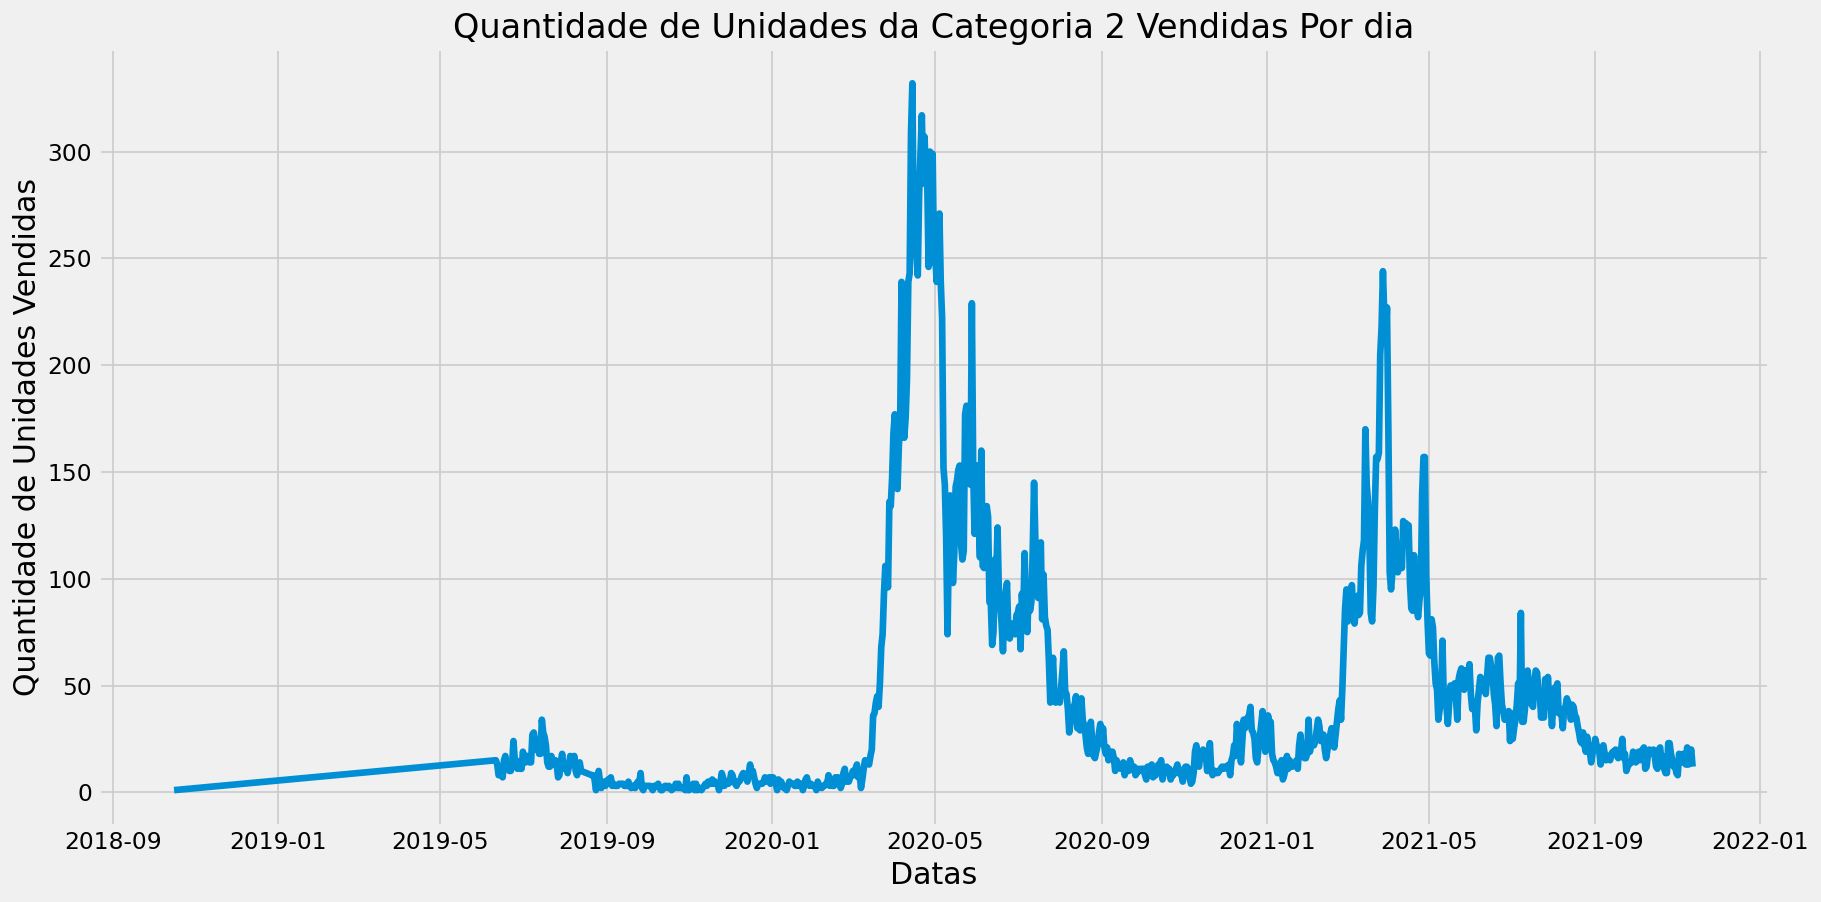

In [397]:
plt.figure(figsize=(16,8))
plt.title('Quantidade de Unidades da Categoria 2 Vendidas Por dia')
plt.plot(cat2['UNITS_SOLD'])
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas', fontsize=18)
plt.show()

Irei converter meu dataframe em um array para melhor desempenho ao processar o modelo

In [398]:
data_cat2 = cat2.filter(['UNITS_SOLD'])
dataset_cat2 = data_cat2.values

### 6.2.1. Preparando os dados para o modelo - Categoria 2 <a class="anchor" id="section_6_2_1"></a>

In [399]:
training_data_len_cat2 = math.ceil( len(dataset_cat2) * 0.8 )
training_data_len_cat2

704

In [400]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_cat2 = scaler.fit_transform(dataset_cat2)

Criando o dataset de treino

In [401]:
train_data_cat2 = scaled_data_cat2[0:training_data_len_cat2, :]
len(train_data_cat2)

704

Dividindo o dataset em x_train e y_train

In [402]:
x_train_cat2 = []
y_train_cat2 = []
for i in range(60, len(train_data_cat2)):
  x_train_cat2.append(train_data_cat2[i-60:i, 0]) #Will conaint 60 values (0-59)
  y_train_cat2.append(train_data_cat2[i, 0]) #Will contain the 61th value (60)
  if i <= 60:
    print(x_train_cat2)
    print(y_train_cat2)
    print()

[array([0.        , 0.04229607, 0.03625378, 0.02114804, 0.02416918,
       0.02416918, 0.01812689, 0.04229607, 0.04833837, 0.03021148,
       0.03323263, 0.02719033, 0.02719033, 0.03625378, 0.0694864 ,
       0.04229607, 0.04229607, 0.03021148, 0.03625378, 0.03021148,
       0.03021148, 0.05438066, 0.04531722, 0.03927492, 0.04833837,
       0.04531722, 0.03927492, 0.03927492, 0.07854985, 0.081571  ,
       0.0694864 , 0.05740181, 0.06646526, 0.05135952, 0.05135952,
       0.09969789, 0.081571  , 0.0755287 , 0.06344411, 0.03927492,
       0.03323263, 0.03323263, 0.04833837, 0.03927492, 0.03625378,
       0.04229607, 0.03625378, 0.01812689, 0.02114804, 0.03927492,
       0.05135952, 0.03323263, 0.03021148, 0.03625378, 0.02416918,
       0.03323263, 0.04833837, 0.04531722, 0.03927492, 0.04833837])]
[0.027190332326283987]



In [403]:
x_train_cat2, y_train_cat2 = np.array(x_train_cat2), np.array(y_train_cat2)
x_train_cat2 = np.reshape(x_train_cat2, (x_train_cat2.shape[0], x_train_cat2.shape[1], 1))
x_train_cat2.shape

(644, 60, 1)

### 6.2.2. Construindo o Modelo LSTM - Categoria 2 <a class="anchor" id="section_6_2_2"></a>

In [404]:
model_cat2 = Sequential()
model_cat2.add(LSTM(50, return_sequences=True, input_shape=(x_train_cat2.shape[1], 1)))
model_cat2.add(LSTM(50, return_sequences=False))
model_cat2.add(Dense(25))
model_cat2.add(Dense(1))

Compilando o modelo com o otimizador Adam

In [405]:
model_cat2.compile(optimizer='adam', loss='mean_squared_error')

Treinando o Modelo com os seguintes parametros:
* batch_size = 1
* epochs = 1

In [406]:
model_cat2.fit(x_train_cat2, y_train_cat2, batch_size=1, epochs=1)

644/644 [==============================] - 22s 31ms/step - loss: 0.0076


### 6.2.3. Calculando as Predições com LSTM - Categoria 2 <a class="anchor" id="section_6_2_3"></a>

Nos Próximos passos irei realizar os seguintes procedimentos para calcular as predições com o modelo LSTM
* Converter os dados do dataset de teste em um array
* Realizar o Reshape no array
* Calcular as predições

In [407]:
test_data_cat2 = scaled_data_cat2[training_data_len_cat2 - 60:]
x_test_cat2 = []
y_test_cat2 = dataset_cat2[training_data_len_cat2:, :]
for i in range(60, len(test_data_cat2)):
  x_test_cat2.append(test_data_cat2[i-60:i, 0])

In [408]:
x_test_cat2 = np.array(x_test_cat2)

In [409]:
x_test_cat2 = np.reshape(x_test_cat2, (x_test_cat2.shape[0], x_test_cat2.shape[1], 1))

In [410]:
predictions_cat2 = model_cat2.predict(x_test_cat2)
predictions_cat2 = scaler.inverse_transform(predictions_cat2)

6/6 [==============================] - 1s 21ms/step


### 6.2.4. Medidas de Avaliação do Modelo - Categoria 2 <a class="anchor" id="section_6_2_4"></a>

Para avaliar o modelo foi calculado:
   * RMSE
   * MAE - Mean Absolute Error
   * MAPE - Mean Absolute Percentage Error

In [411]:
MAE_cat2 = mean_absolute_error(y_test_cat2, predictions_cat2)
MAE_cat2

6.546515802655901

In [412]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [413]:
MAPE_cat2 = MAPE(y_test_cat2, predictions_cat2)
MAPE_cat2

25.167482903408

In [414]:
rmse_cat2 = np.sqrt( np.mean( predictions_cat2 - y_test_cat2 )**2 )
rmse_cat2

3.308925971984863

/var/folders/9y/7bgc1sx94m72s14g9jk5ccfw0000gn/T/ipykernel_5410/1705608689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_cat2['Predictions_cat2'] = predictions_cat2


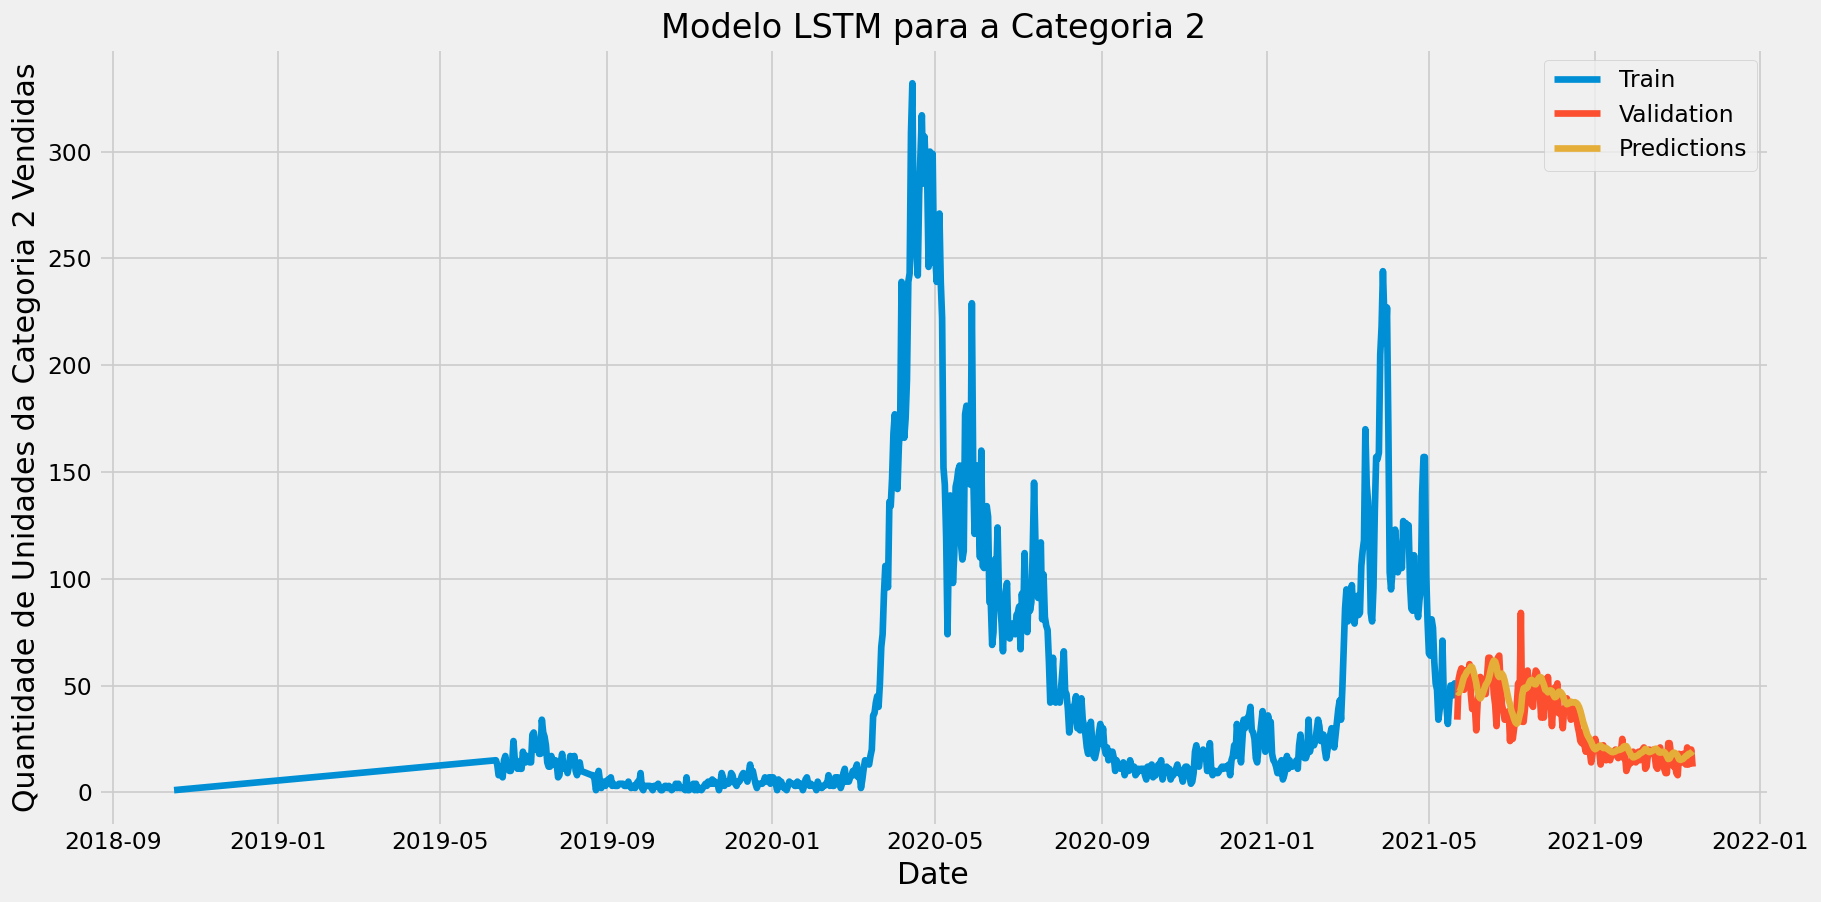

In [415]:
train_cat2 = data_cat2[:training_data_len_cat2]
valid_cat2 = data_cat2[training_data_len_cat2:]
valid_cat2['Predictions_cat2'] = predictions_cat2
plt.figure(figsize=(16,8))
plt.title('Modelo LSTM para a Categoria 2')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Quantidade de Unidades da Categoria 2 Vendidas', fontsize=18)
plt.plot(train_cat2['UNITS_SOLD'])
plt.plot(valid_cat2[['UNITS_SOLD', 'Predictions_cat2']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='upper right')
plt.show()

Este modelo também acompanha bem os dados dos produtos da categoria 2

## 6.3. Categoria 3 - Modelo LSTM <a class="anchor" id="section_6_3"></a>

In [419]:
df = pd.read_csv('series.csv')
cat3 = df[df["CATEGORY"] == 'CATEG-3']
cat3=cat3.set_index('DATE')
cat3.index = pd.to_datetime(cat3.index)
cat3=cat3.resample('D').mean()
cat3 = cat3[cat3['UNITS_SOLD'].notna()]
cat3.shape

(920, 1)

Os produtos vendidos da categoria 3 são a origem da disparada vertiginosa de vendas. 

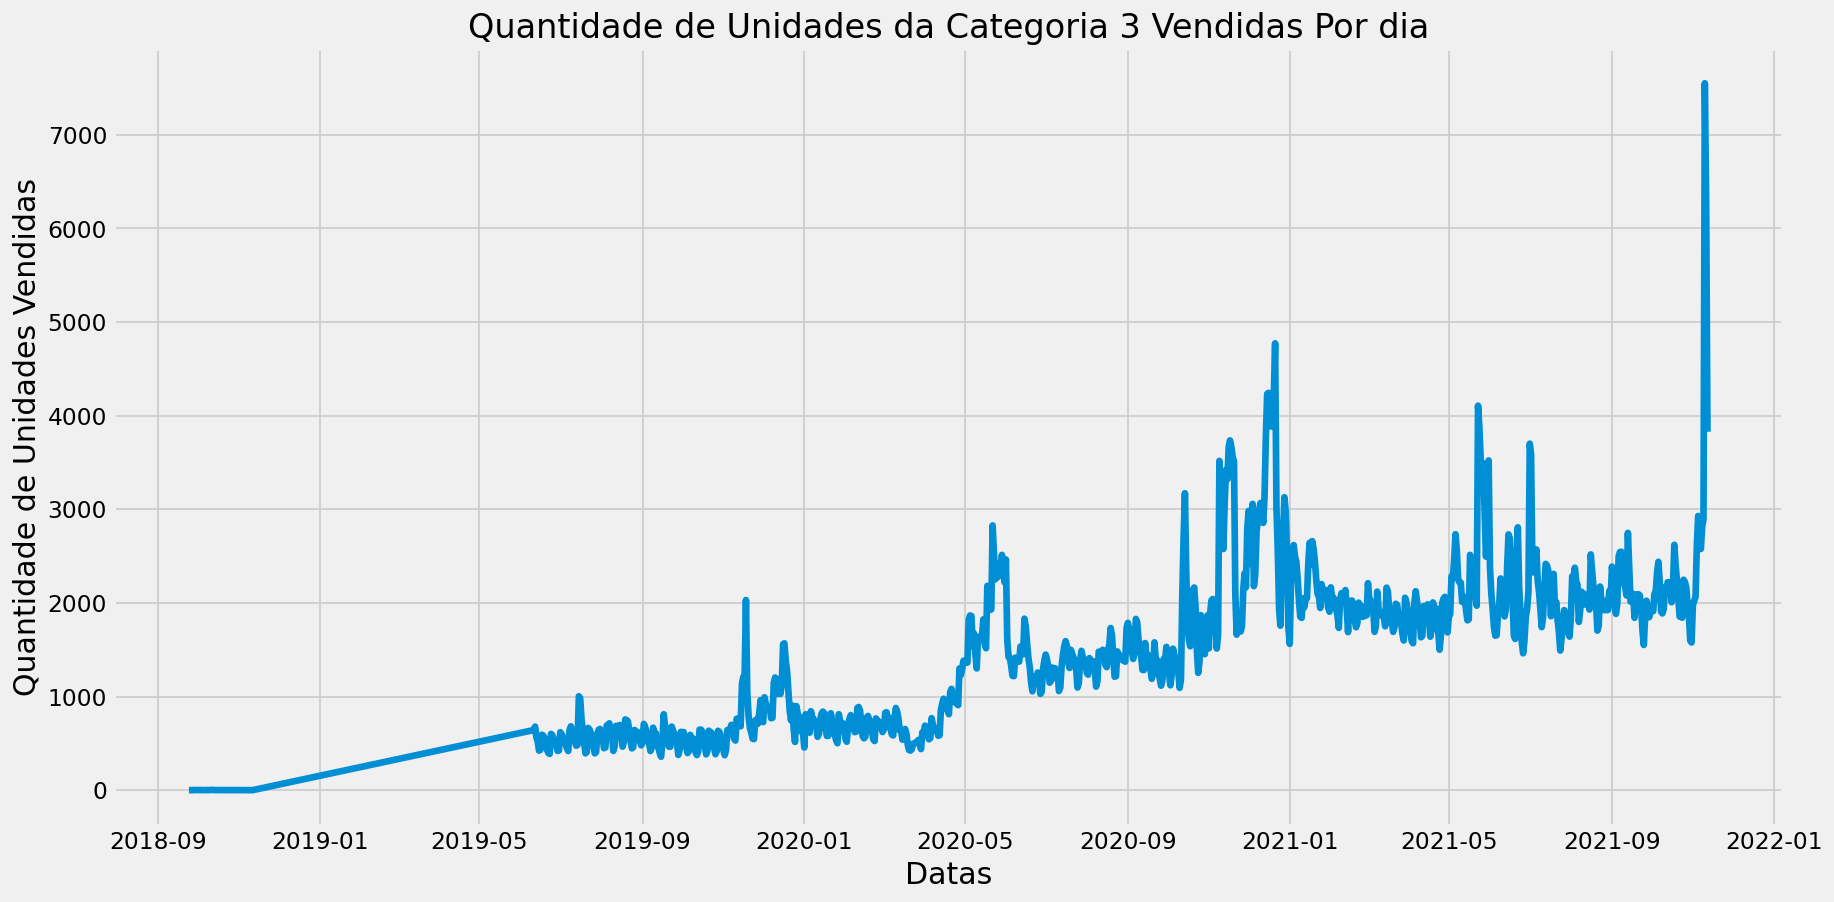

In [420]:
plt.figure(figsize=(16,8))
plt.title('Quantidade de Unidades da Categoria 3 Vendidas Por dia')
plt.plot(cat3['UNITS_SOLD'])
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas', fontsize=18)
plt.show()

Irei converter meu dataframe em um array para melhor desempenho ao processar o modelo

In [421]:
data_cat3 = cat3.filter(['UNITS_SOLD'])
dataset_cat3 = data_cat3.values

### 6.3.1. Preparando os dados para o modelo - Categoria 3 <a class="anchor" id="section_6_3_1"></a>

In [422]:
training_data_len_cat3 = math.ceil( len(dataset_cat3) * 0.8 )
training_data_len_cat3

736

In [423]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_cat3 = scaler.fit_transform(dataset_cat3)

Criando o dataset de treino

In [424]:
train_data_cat3 = scaled_data_cat3[0:training_data_len_cat3, :]
len(train_data_cat3)

736

Dividindo o dataset em x_train e y_train

In [425]:
x_train_cat3 = []
y_train_cat3 = []
for i in range(60, len(train_data_cat3)):
  x_train_cat3.append(train_data_cat3[i-60:i, 0]) #Will conaint 60 values (0-59)
  y_train_cat3.append(train_data_cat3[i, 0]) #Will contain the 61th value (60)
  if i <= 60:
    print(x_train_cat3)
    print(y_train_cat3)
    print()

[array([0.        , 0.        , 0.        , 0.00026487, 0.00013243,
       0.00013243, 0.00026487, 0.00013243, 0.00026487, 0.        ,
       0.00013243, 0.00013243, 0.00013243, 0.00013243, 0.00026487,
       0.00013243, 0.0003973 , 0.00026487, 0.00013243, 0.00013243,
       0.00013243, 0.00013243, 0.        , 0.00013243, 0.00013243,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08502185,
       0.08992186, 0.0742948 , 0.06886505, 0.05588664, 0.05707853,
       0.07840021, 0.07747318, 0.0742948 , 0.06767316, 0.0573434 ,
       0.05244338, 0.05125149, 0.07959211, 0.07787048, 0.07257317,
       0.06489207, 0.06409747, 0.05548934, 0.0561515 , 0.0819759 ,
       0.07932724, 0.07495696, 0.07071911, 0.06595153, 0.05906502])]
[0.05535690637001722]



In [426]:
x_train_cat3, y_train_cat3 = np.array(x_train_cat3), np.array(y_train_cat3)
x_train_cat3 = np.reshape(x_train_cat3, (x_train_cat3.shape[0], x_train_cat3.shape[1], 1))
x_train_cat3.shape

(676, 60, 1)

### 6.3.2. Construindo o Modelo LSTM - Categoria 3 <a class="anchor" id="section_6_3_2"></a>

In [427]:
model_cat3 = Sequential()
model_cat3.add(LSTM(50, return_sequences=True, input_shape=(x_train_cat3.shape[1], 1)))
model_cat3.add(LSTM(50, return_sequences=False))
model_cat3.add(Dense(25))
model_cat3.add(Dense(1))

Compilando o modelo com o otimizador Adam

In [428]:
model_cat3.compile(optimizer='adam', loss='mean_squared_error')

Treinando o Modelo com os seguintes parametros:
* batch_size = 1
* epochs = 1

In [429]:
model_cat3.fit(x_train_cat3, y_train_cat3, batch_size=1, epochs=1)

676/676 [==============================] - 23s 31ms/step - loss: 0.0031


### 6.3.3. Calculando as Predições com LSTM - Categoria 3 <a class="anchor" id="section_6_3_3"></a>

Nos Próximos passos irei realizar os seguintes procedimentos para calcular as predições com o modelo LSTM
* Converter os dados do dataset de teste em um array
* Realizar o Reshape no array
* Calcular as predições

In [430]:
test_data_cat3 = scaled_data_cat3[training_data_len_cat3 - 60:]
x_test_cat3 = []
y_test_cat3 = dataset_cat3[training_data_len_cat3:, :]
for i in range(60, len(test_data_cat3)):
  x_test_cat3.append(test_data_cat3[i-60:i, 0])

In [431]:
x_test_cat3 = np.array(x_test_cat3)

In [432]:
x_test_cat3 = np.reshape(x_test_cat3, (x_test_cat3.shape[0], x_test_cat3.shape[1], 1))

In [433]:
predictions_cat3 = model_cat3.predict(x_test_cat3)
predictions_cat3 = scaler.inverse_transform(predictions_cat3)

6/6 [==============================] - 1s 20ms/step


### 6.3.4. Medidas de Avaliação do Modelo - Categoria 3 <a class="anchor" id="section_6_3_4"></a>

Para avaliar o modelo foi calculado:
   * RMSE
   * MAE - Mean Absolute Error
   * MAPE - Mean Absolute Percentage Error

In [434]:
MAE_cat3 = mean_absolute_error(y_test_cat3, predictions_cat3)
MAE_cat3

314.4956233812415

In [435]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [436]:
MAPE_cat3 = MAPE(y_test_cat3, predictions_cat3)
MAPE_cat3

12.81177660167841

In [437]:
rmse_cat3 = np.sqrt( np.mean( predictions_cat3 - y_test_cat3 )**2 )
rmse_cat3

46.95687136442765

/var/folders/9y/7bgc1sx94m72s14g9jk5ccfw0000gn/T/ipykernel_5410/1987299379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_cat3['Predictions_cat3'] = predictions_cat3


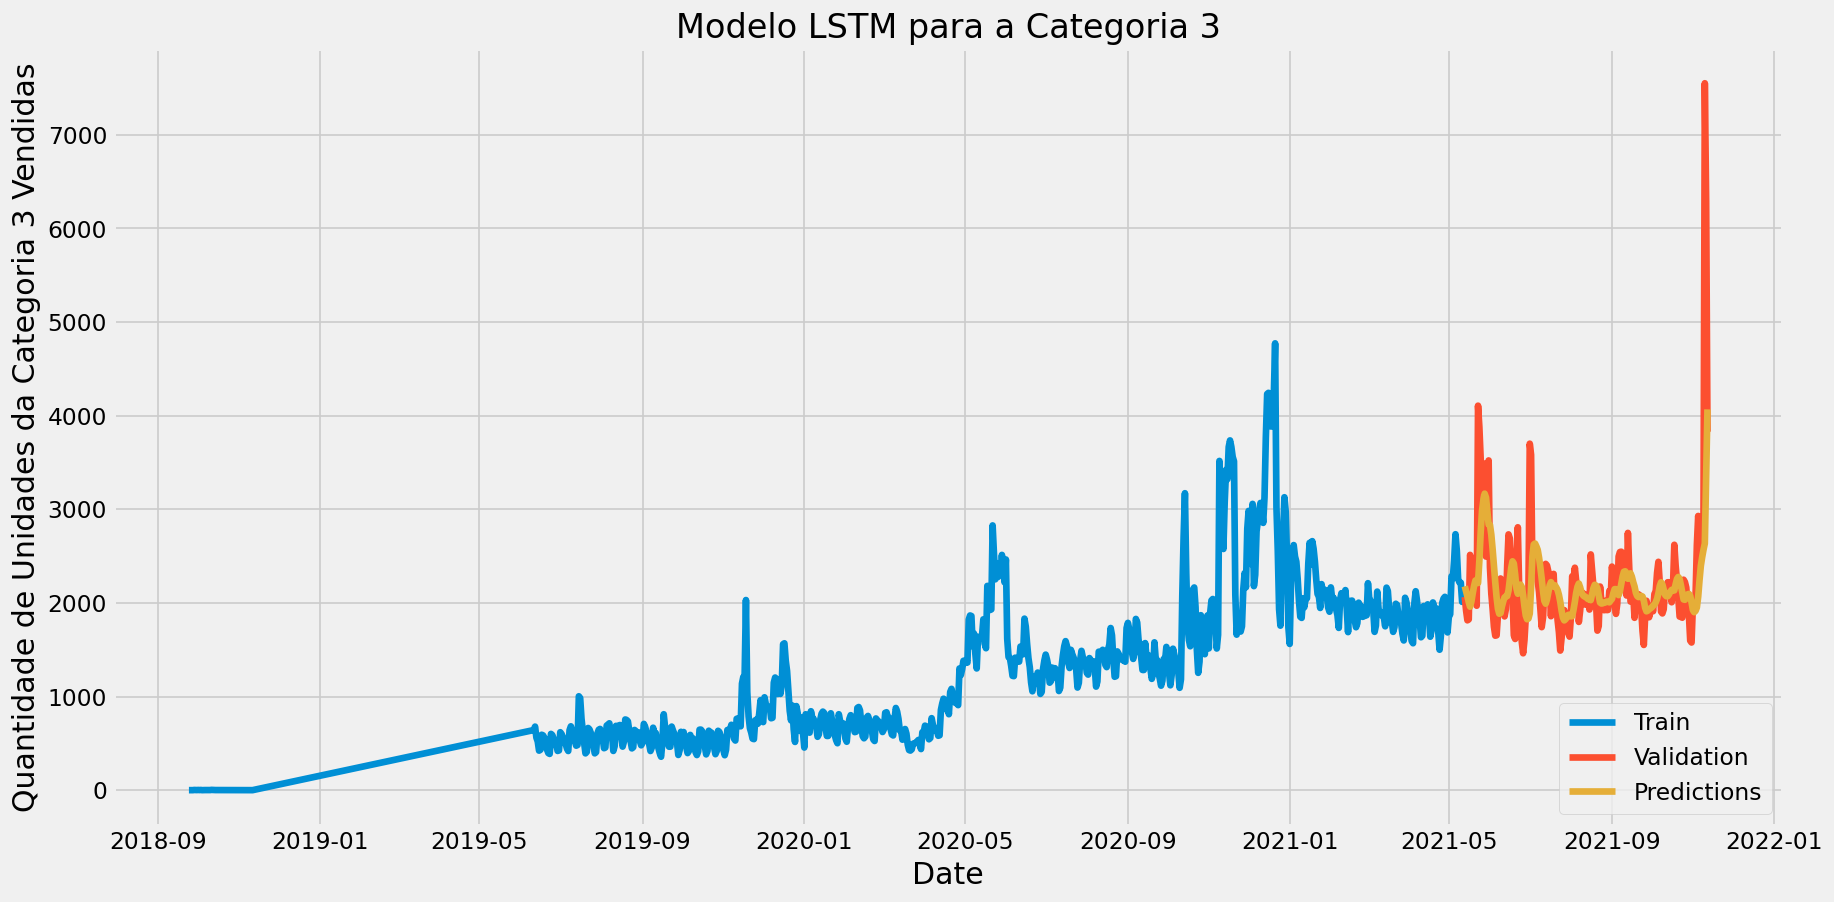

In [438]:
train_cat3 = data_cat3[:training_data_len_cat3]
valid_cat3 = data_cat3[training_data_len_cat3:]
valid_cat3['Predictions_cat3'] = predictions_cat3
plt.figure(figsize=(16,8))
plt.title('Modelo LSTM para a Categoria 3')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Quantidade de Unidades da Categoria 3 Vendidas', fontsize=18)
plt.plot(train_cat3['UNITS_SOLD'])
plt.plot(valid_cat3[['UNITS_SOLD', 'Predictions_cat3']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

Este é o modelo que tem o comportamento mais parecido com os modelos desenvolvidos incialmente. O desemepnho é bom, uma vez que não há necessidade de acompanahr rigorosamente a alta expressiva ao final, pois haveria até indícios de estar caindo em um problema de overfitting.

Com as análises feitas até aqui é recomendado que seja desenvolvido e mantido um modelo para cada tipo de categoria, desta maneira é possível manter uma melhor rastreabilidade de eventos atípicos sazonais.

# 7. Fazendo previsão dos próximos 21 dias - Por Categorias <a class="anchor" id="chapter7"></a>

Será realizada então a previsão dos próximos 21 dias com cada um dos modelos de maneira separada. Isso tratá um melhor nível de detalhamento para nossos dados

## 7.1. Categoria 1 - Próximos 21 dias <a class="anchor" id="section_7_1"></a>

In [466]:
X_FUTURE = 21
future_cat1 = np.array([])
last1 = x_test_cat1[-1]
for i in range(X_FUTURE):
  curr_prediction_cat1 = model_cat1.predict(np.array([last1]))
  print(curr_prediction_cat1)
  last1 = np.concatenate([last1[1:], curr_prediction_cat1])
  future_cat1 = np.concatenate([future_cat1, curr_prediction_cat1[0]])
future_cat1 = scaler.inverse_transform([future_cat1])[0]

1/1 [==============================] - 0s 36ms/step
[[0.48320925]]
1/1 [==============================] - 0s 34ms/step
[[0.5123078]]
1/1 [==============================] - 0s 34ms/step
[[0.5052429]]
1/1 [==============================] - 0s 32ms/step
[[0.48420393]]
1/1 [==============================] - 0s 33ms/step
[[0.45839757]]
1/1 [==============================] - 0s 62ms/step
[[0.43188742]]
1/1 [==============================] - 0s 48ms/step
[[0.40655032]]
1/1 [==============================] - 0s 54ms/step
[[0.38325214]]
1/1 [==============================] - 0s 44ms/step
[[0.3623447]]
1/1 [==============================] - 0s 48ms/step
[[0.34389517]]
1/1 [==============================] - 0s 48ms/step
[[0.32780567]]
1/1 [==============================] - 0s 34ms/step
[[0.31388384]]
1/1 [==============================] - 0s 36ms/step
[[0.30188727]]
1/1 [==============================] - 0s 38ms/step
[[0.29155397]]
1/1 [==============================] - 0s 35ms/step
[[0.28262284]

In [467]:
X_FUTURE = 21
dicts_cat1 = []
curr_date_cat1 = data_cat1.index[-1]
for i in range(X_FUTURE):
  curr_date_cat1 = curr_date_cat1 + timedelta(days=1)
  dicts_cat1.append({'Predictions_cat1':future_cat1[i], "Date": curr_date_cat1})

new_data_cat1 = pd.DataFrame(dicts_cat1).set_index("Date")

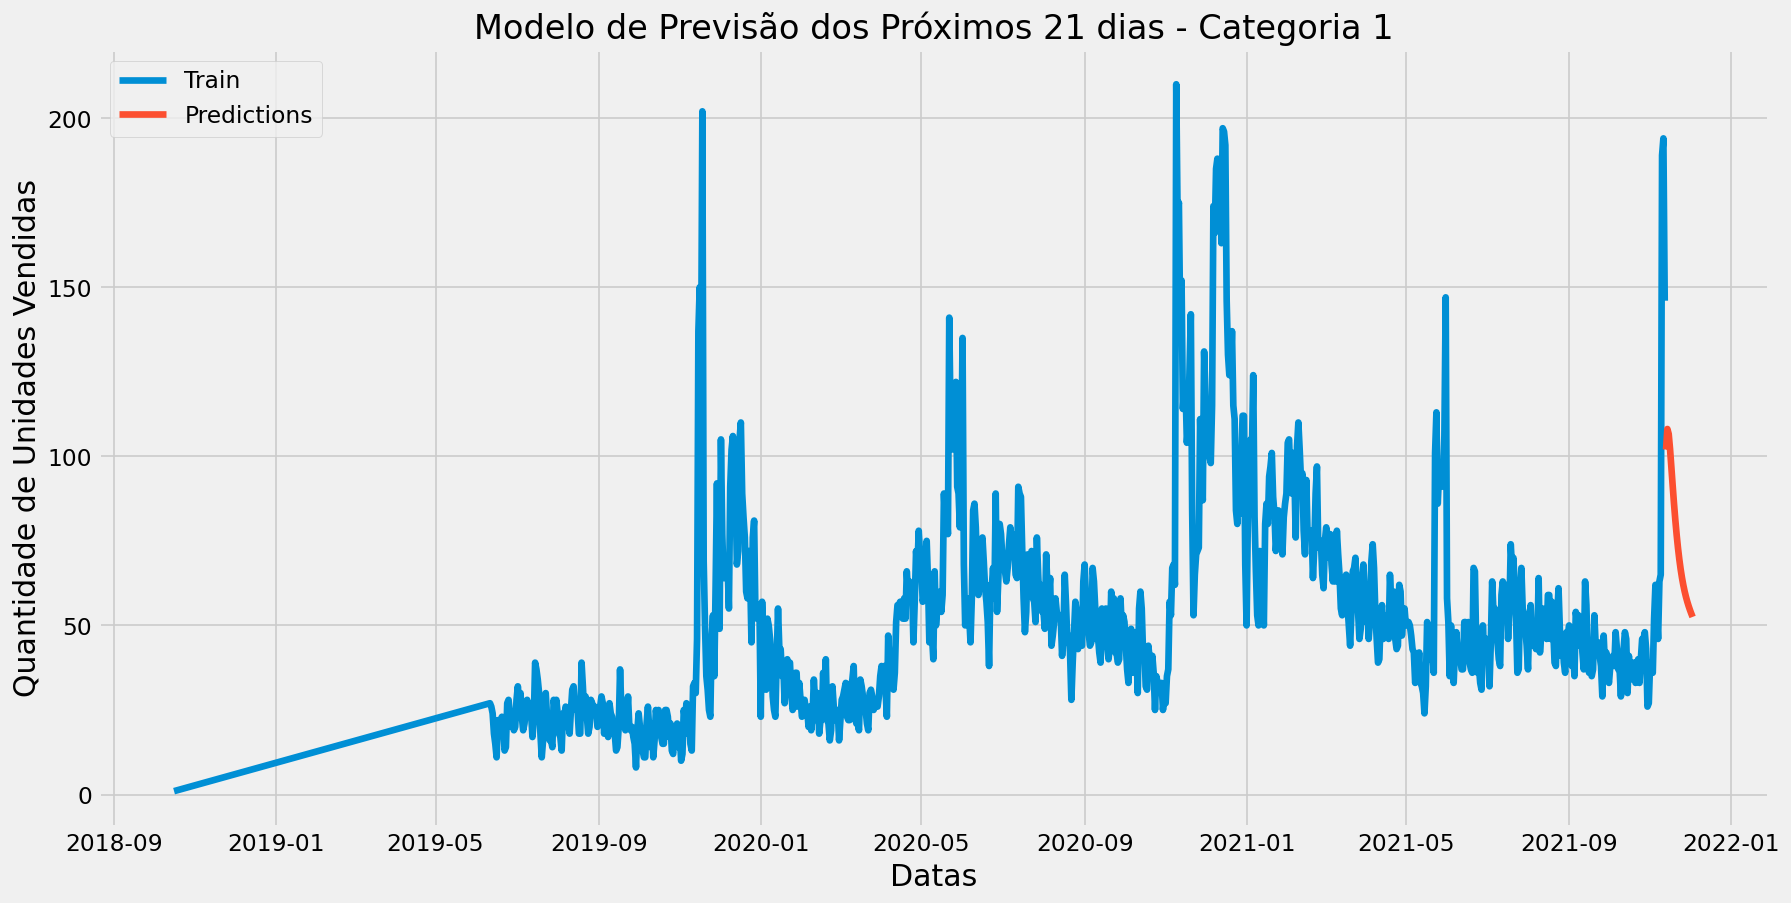

In [468]:
plt.figure(figsize=(16,8))
plt.title('Modelo de Previsão dos Próximos 21 dias - Categoria 1')
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas', fontsize=18)
plt.plot(data_cat1['UNITS_SOLD'])
plt.plot(new_data_cat1['Predictions_cat1'])
plt.legend(['Train', 'Predictions'], loc='upper left')
plt.show()

## 7.2. Categoria 2 - Próximos 21 dias <a class="anchor" id="section_7_2"></a>

In [416]:
X_FUTURE = 21
future_cat2 = np.array([])
last2 = x_test_cat2[-1]
for i in range(X_FUTURE):
  curr_prediction_cat2 = model_cat2.predict(np.array([last]))
  print(curr_prediction_cat2)
  last = np.concatenate([last2[1:], curr_prediction_cat2])
  future_cat2 = np.concatenate([future_cat2, curr_prediction_cat2[0]])
future_cat2 = scaler.inverse_transform([future_cat2])[0]

1/1 [==============================] - 0s 50ms/step
[[0.05955727]]
1/1 [==============================] - 0s 44ms/step
[[0.05755314]]
1/1 [==============================] - 0s 41ms/step
[[0.05731735]]
1/1 [==============================] - 0s 67ms/step
[[0.05728962]]
1/1 [==============================] - 0s 58ms/step
[[0.05728635]]
1/1 [==============================] - 0s 64ms/step
[[0.05728597]]
1/1 [==============================] - 0s 53ms/step
[[0.05728593]]
1/1 [==============================] - 0s 64ms/step
[[0.05728592]]
1/1 [==============================] - 0s 53ms/step
[[0.05728592]]
1/1 [==============================] - 0s 58ms/step
[[0.05728591]]
1/1 [==============================] - 0s 40ms/step
[[0.05728592]]
1/1 [==============================] - 0s 52ms/step
[[0.05728592]]
1/1 [==============================] - 0s 37ms/step
[[0.05728591]]
1/1 [==============================] - 0s 54ms/step
[[0.05728592]]
1/1 [==============================] - 0s 44ms/step
[[0.057285

In [417]:
dicts_cat2 = []
curr_date_cat2 = data_cat2.index[-1]
for i in range(X_FUTURE):
  curr_date_cat2 = curr_date_cat2 + timedelta(days=1)
  dicts_cat2.append({'Predictions_cat2':future_cat2[i], "Date": curr_date_cat2})

new_data_cat2 = pd.DataFrame(dicts_cat2).set_index("Date")

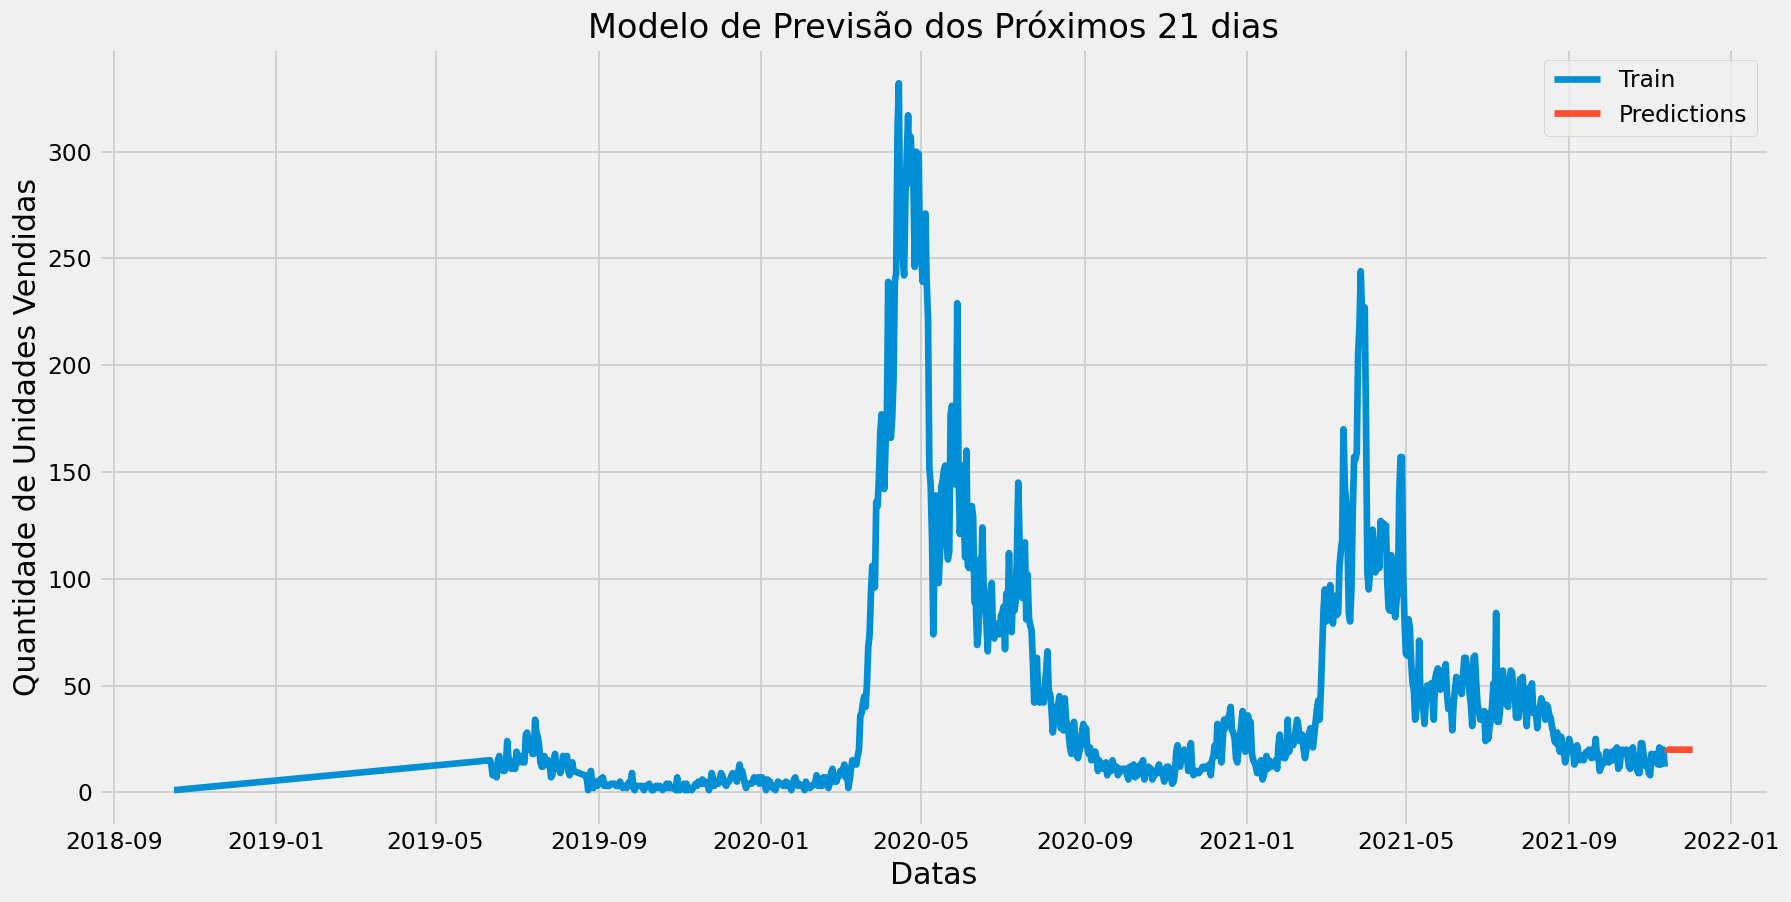

In [418]:
plt.figure(figsize=(16,8))
plt.title('Modelo de Previsão dos Próximos 21 dias')
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas', fontsize=18)
plt.plot(data_cat2['UNITS_SOLD'])
plt.plot(new_data_cat2['Predictions_cat2'])
plt.legend(['Train', 'Predictions'], loc='upper right')
plt.show()

## 7.3. Categoria 2 - Próximos 21 dias <a class="anchor" id="section_7_3"></a>

In [439]:
X_FUTURE = 21
future_cat3 = np.array([])
last = x_test_cat3[-1]
for i in range(X_FUTURE):
  curr_prediction_cat3 = model_cat3.predict(np.array([last]))
  print(curr_prediction_cat3)
  last = np.concatenate([last[1:], curr_prediction_cat3])
  future_cat3 = np.concatenate([future_cat3, curr_prediction_cat3[0]])
future_cat3 = scaler.inverse_transform([future_cat3])[0]

1/1 [==============================] - 0s 43ms/step
[[0.53867835]]
1/1 [==============================] - 0s 33ms/step
[[0.56981015]]
1/1 [==============================] - 0s 33ms/step
[[0.57216555]]
1/1 [==============================] - 0s 41ms/step
[[0.5588977]]
1/1 [==============================] - 0s 55ms/step
[[0.53774387]]
1/1 [==============================] - 0s 52ms/step
[[0.5133327]]
1/1 [==============================] - 0s 43ms/step
[[0.4884932]]
1/1 [==============================] - 0s 50ms/step
[[0.4649495]]
1/1 [==============================] - 0s 40ms/step
[[0.4437069]]
1/1 [==============================] - 0s 49ms/step
[[0.4252813]]
1/1 [==============================] - 0s 45ms/step
[[0.40984848]]
1/1 [==============================] - 0s 43ms/step
[[0.3973512]]
1/1 [==============================] - 0s 42ms/step
[[0.3875773]]
1/1 [==============================] - 0s 40ms/step
[[0.38021973]]
1/1 [==============================] - 0s 60ms/step
[[0.37492052]]
1/1

In [440]:
dicts_cat3 = []
curr_date_cat3 = data_cat3.index[-1]
for i in range(X_FUTURE):
  curr_date_cat3 = curr_date_cat3 + timedelta(days=1)
  dicts_cat3.append({'Predictions':future_cat3[i], "Date": curr_date_cat3})

new_data_cat3 = pd.DataFrame(dicts_cat3).set_index("Date")

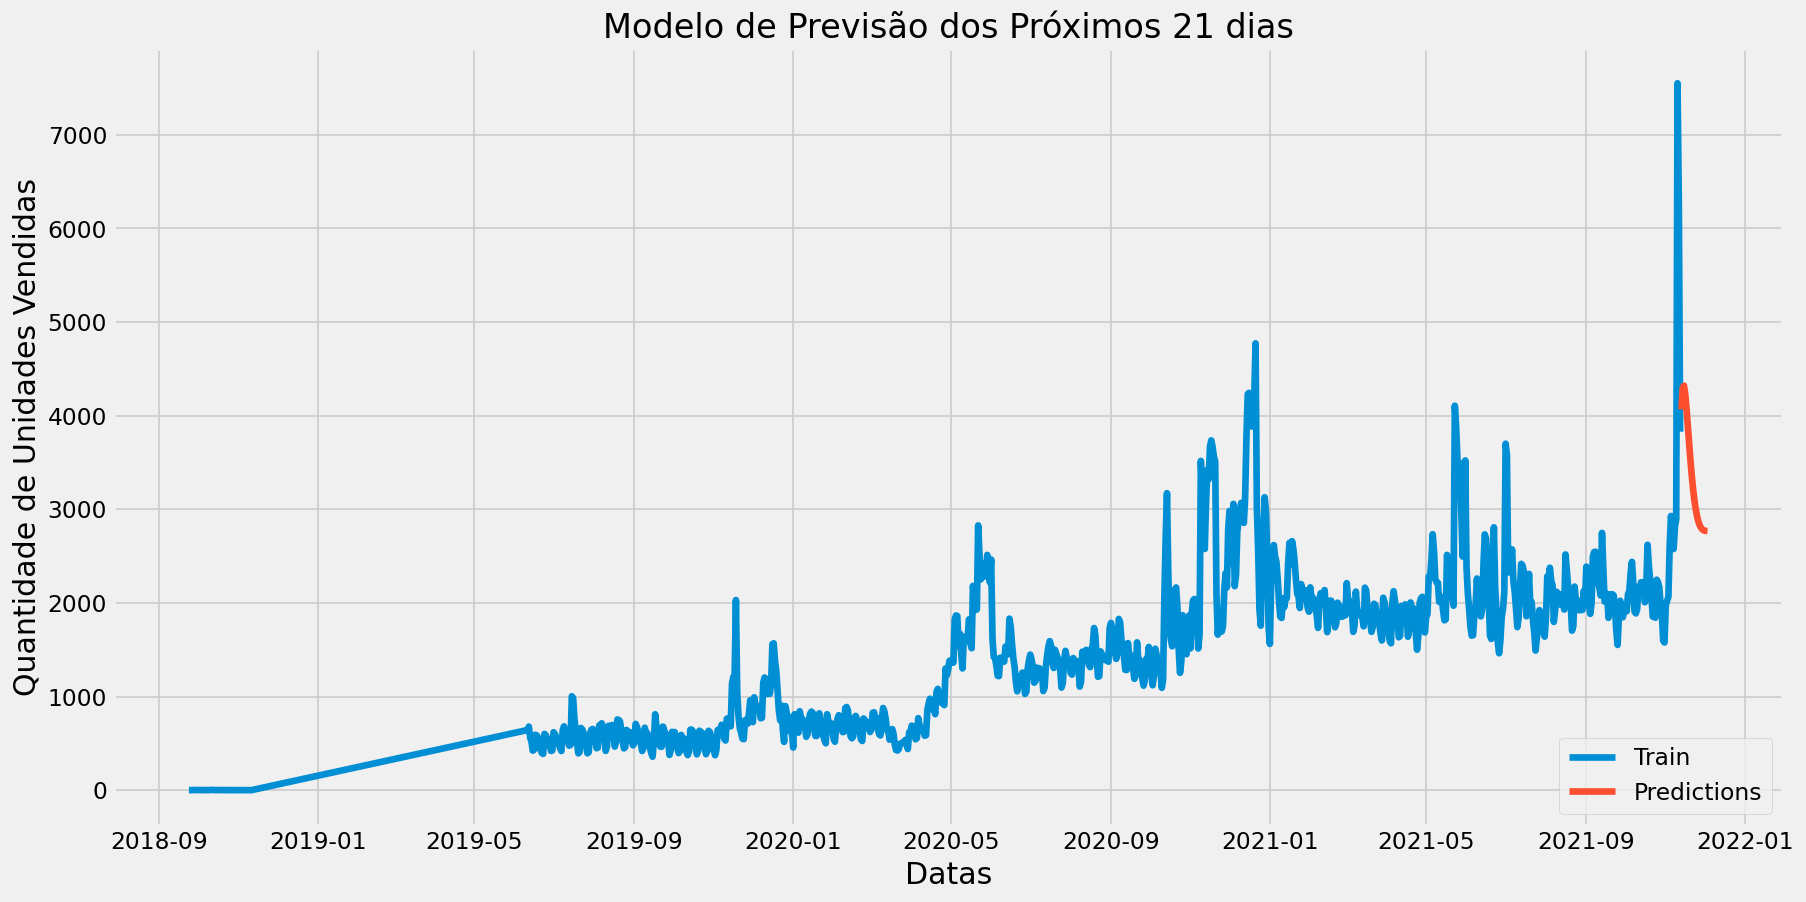

In [441]:
plt.figure(figsize=(16,8))
plt.title('Modelo de Previsão dos Próximos 21 dias')
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Quantidade de Unidades Vendidas', fontsize=18)
plt.plot(data_cat3['UNITS_SOLD'])
plt.plot(new_data_cat3['Predictions'])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()

# 8. Comparando os modelos <a class="anchor" id="chapter8"></a>

In [469]:
print(MAE_ARIMA, MAE_full, MAE2021, MAE_cat1, MAE_cat2, MAE_cat3)

289.93278316610446 119.03082297504812 144.14059755032656 11.122791635114595 6.546515802655901 314.4956233812415


In [470]:
print(MAPE_ARIMA, MAPE_full, MAPE2021, MAPE_cat1, MAPE_cat2, MAPE_cat3)

20.582937157795516 13.395170444937547 15.41748331877321 18.83941121085967 25.167482903408 12.81177660167841


In [471]:
print(rmse_ARIMA, rmse_full, rmse2021, rmse_cat1, rmse_cat2, rmse_cat3)

261.14570244676946 71.44135870449784 7.203987565620869 5.930998829125011 3.308925971984863 46.95687136442765


| MODELO | MAE | MAPE | RMSE |
| --- | --- | --- | --- |
| ARIMA | 289.93 | 20.58 | 261.14 |
| LSTM Full | 119.03 | 13.39 | 71.44 |
| LSTM 2021 | 114.14 | 15.41 | 7.20 |
| LSTM CAT_1 | 11.12 | 18.83 | 5.93 |
| LSTM CAT_2 | 6.54 | 25.16 | 3.30 |
| LSTM CAT_3 | 314.49 | 12.81 | 46.95 |

Ao comparamos todos os modelos desenvolvidos fica nítido o melhor desemepenho, primeiramente, dos modelos desenvolvidos com LSTM. Em um segundo momento tamébem  possível aferir um melhor desempenho dos modelos desenvolvidos por categoria, o caso particlar da categoria 3 reflete a ocorrência de um píodero sazonal atípico mas ainda assim houve bom comportamento do modelo desenvolvido.

# 9. Considerações e Sugestões Finais <a class="anchor" id="chapter9"></a>

Como consideração final deste trabalho deixo quatro pontos.

* 1) Para este conjunto de dados o modelo de Redes Neurais LSTM apresentou um melhor desempenho e é o recomendado para produção.
* 2) Conforme resultados comparativos entre os modelos com todas as datas e apenas com os dados do ano de 2021, há a possibilidade de utilizar apenas o ano de 2021 para prever resultados sem perca de desempenho.
* 3) Para um melhor acompanhamento dos resultados gerados de maneira diária, é recomendado o uso de um modelo específico de ériess temporais para cada categoria de produto, mesmo que eles compartilhem o mesmo ID.
* 4) Para monitorar de maneira estratégica as vendas gerais destes e de outros produtos em conjunto, sugere-se o uso de um modelo de séries temporais com dados agrupados por mês como o que sea rapresentado a seguir.

## 9.1. Fazendo previsão de todas categorias juntas por mês <a class="anchor" id="section_9_1"></a>

A primeira visualização dos dados não é satisfatória. Irei realizar aguns procedimentos para que possa ter um melhor resultado.

O primeiro passo é transforma a coluna DATE no index do dataframe

array([<AxesSubplot:xlabel='DATE'>], dtype=object)

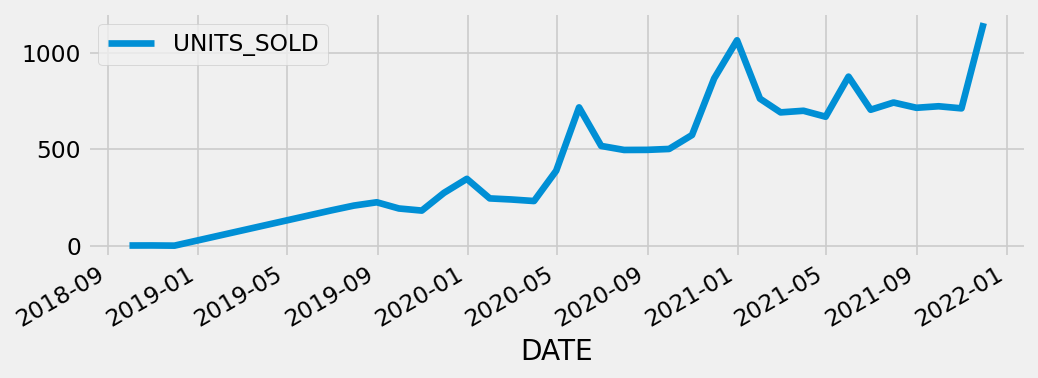

In [497]:
df_m =df.set_index('DATE')
df_m.index = pd.to_datetime(df_m.index)
df_m =df_m.resample('M').mean()
df_m = df_m[df_m['UNITS_SOLD'].notna()]
df_m.plot(subplots=True)

Após realizar o resampling a visualização dos dados esta clara. É possível observar ausência de dados entre os meses de janeiro e junho de 2019. A análise de séries temporais não permite valores nulos, por este motivo montarei meu dataframe final sem os valores nulos.

Deste gráfico também é possível observar possíveis indícios de sazonalidade, nos períodos de meio e final de ano. Levarei isso em consideração no momento em que for indicar os parâmetros do modelo de séries temporais

### 9.1.1. Modelo AUTO ARIMA para previsão mensal <a class="anchor" id="section_9_1_1">

In [475]:
model_m = pm.auto_arima(df_m['UNITS_SOLD'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=261.373, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=260.479, Time=0.07 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=259.409, Time=0.03 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,2,0)(0,1,1)[12]             : AIC=260.472, Time=0.11 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=262.471, Time=0.29 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=258.597, Time=0.05 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=260.142, Time=0.09 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(3,2,0)(0,1,0)[12]             : AIC=259.880, Time=0.08 sec
 ARIMA(2,2,1)(0,1,0)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(3,2,1)(0,1,0)[12]             : AIC=inf, Time=0.07 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,2,0)(0,1,0)[12] intercept   : AIC=260.587, Time=0.18 sec

Best model:  ARIMA(2,2,0)(0,1,0)[12]          
Total fit time: 1.736 seconds


In [476]:
print(model_m.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   33
Model:             SARIMAX(2, 2, 0)x(0, 1, 0, 12)   Log Likelihood                -126.299
Date:                            Thu, 04 Aug 2022   AIC                            258.597
Time:                                    22:20:49   BIC                            261.431
Sample:                                         0   HQIC                           259.077
                                             - 33                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6101      0.472     -1.291      0.197      -1.536       0.316
ar.L2         -0.4982      0.257   

Os parâmetros utilizados no modelo AUTO ARIMA foram os seguintes:

* m=12 - Representa o número de meses em um ano
* start_p=0 - Representa o valor mínimo de p (Parâmetro de Auto Correlação) que a função pode selecionar durante a busca aletória
* start_q=0 - Representa o valor mínimo de q (Parâmetro de Médias Móveis) que a função pode selecionar durante a busca aletória.
* mar_order=4 - Representa o máximo que os parâmetros p,d e q podem assumir durante a busca aletória
* test='adf' - Para que se utilize o teste ADF para verificar a estacionariedade da série
* suppress_warnings=True - suprimir mensagens de avisos
* stepwise=True - Método de busca pelo melhor parametro


O melhor modelo arima encontrado foi ARIMA(2,2,0)(p=2,d=2,q=0).

Houveram dois procedimento de diferenciação da série, o que confirma a suspeita inicial de haver sazonalidade na série

### 9.1.2. Dividindo o dataset (Treino e Teste) - Previsão Mensal <a class="anchor" id="section_9_1_2">

Realizarei o corte do dataset nadata de 31 de agosto de 2021, desta maneira terei 30 pontos para serem treinados e 3 para serem testados no dataset test

In [479]:
df_m.shape

(33, 1)

In [480]:
train_m=df_m[(df_m.index.get_level_values(0) >= '2018-09-30') & (df_m.index.get_level_values(0) <= '2021-08-31')]

In [481]:
test_m=df_m[(df_m.index.get_level_values(0) > '2021-08-31')]

In [482]:
train_m.shape

(30, 1)

In [483]:
test_m.shape

(3, 1)

In [484]:
model_m.fit(train_m['UNITS_SOLD'])

ARIMA(order=(2, 2, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [485]:
forecast_m=model_m.predict(n_periods=3, return_conf_int=True)

In [486]:
forecast_m

(array([ 726.33782729,  828.88266093, 1120.81945539]),
 array([[ 350.69841841, 1101.97723616],
        [ 179.45597203, 1478.30934982],
        [ 220.44146376, 2021.19744702]]))

In [487]:
forecast_m_df = pd.DataFrame(forecast_m[0],index = test_m.index,columns=['Prediction'])

Após treino dos dados, os dados previstos são os seguintes:

In [488]:
forecast_m_df

,Prediction
DATE,
2021-09-30,726.337827
2021-10-31,828.882661
2021-11-30,1120.819455


<AxesSubplot:xlabel='DATE'>

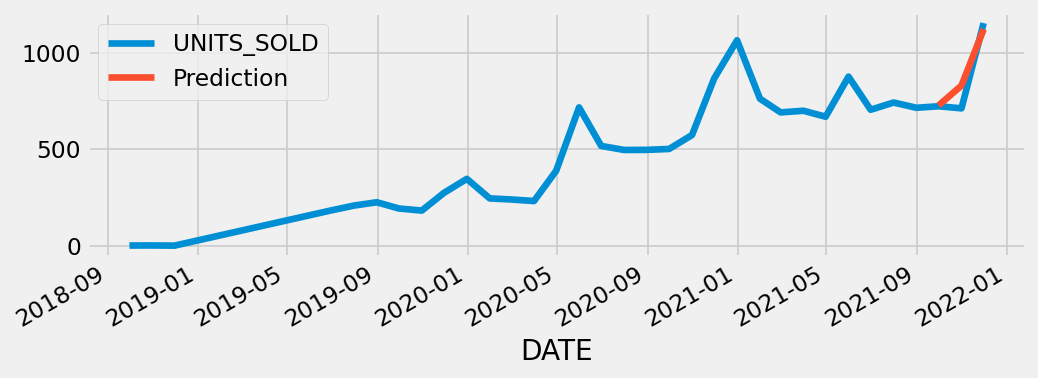

In [490]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
pd.concat([df_m['UNITS_SOLD'],forecast_m_df],axis=1).plot()

A linha azul representa a quantidade que de fato foi vendida no período e a linha laranja é a previsão estimada pelo modelo ARIMA. 
Os resultados do modelo são muito satisfatórios, o próximo passo será prever valores futuros que ainda não temos registro em nosso dataset inicial.

### 9.1.3. Prevendo Futuros valores Desconhecidos por mês <a class="anchor" id="section_9_1_3">

Utilizando o modelo ARIMA criado, irei estimar mais 8 períodos a partir da data de 1° de setembro de 2021.

In [491]:
forecast_m1=model_m.predict(n_periods=8, return_conf_int=True)
forecast_range_m=pd.date_range(start='2021-09-01', periods=8,freq='M')


In [492]:
forecast_m1_df = pd.DataFrame(forecast_m1[0],index =forecast_range_m,columns=['Prediction'])

Os 8 novos períodos previstos são os seguintes:

In [493]:
forecast_m1_df

,Prediction
2021-09-30,726.337827
2021-10-31,828.882661
2021-11-30,1120.819455
2021-12-31,1324.401613
2022-01-31,1040.061269
2022-02-28,976.245040
2022-03-31,992.132189
2022-04-30,974.040257


<AxesSubplot:>

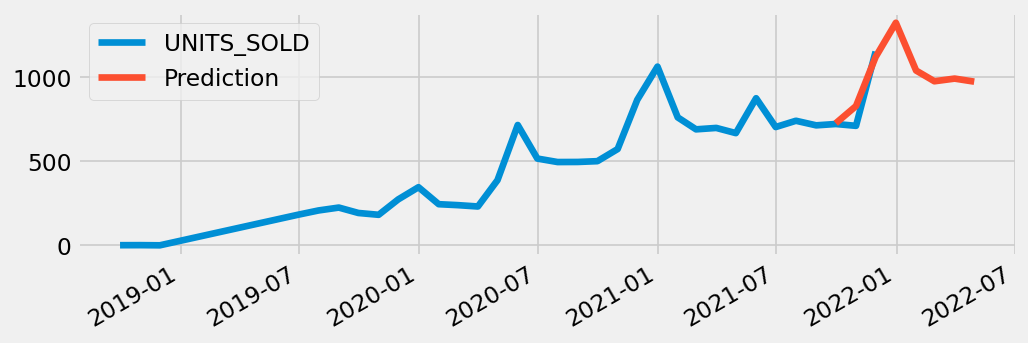

In [494]:
pd.concat([df_m['UNITS_SOLD'],forecast_m1_df],axis=1).plot()

Observando os dados originais e os previstos temos um bom resultado de previsão de séries temporais. Os novos pontos acompanham a tendência de crescimento observada desde o ano 2019 e também os picos de sazonalidade identificados e apontados pelo teste ACF.